# CTM_LSS_DL
根据CTM影像特征，采用多种算法比较研究，判断LSS_DL

# 准备环境

In [3]:
import os,sys 
from ultils_for_ML_binary_classify import *
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.8/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

# 数据预处理

## 读取原始数据

In [4]:
dir_result = './results'#结果保存路径
if not os.path.isdir(dir_result):
    os.mkdir(dir_result)

# 数据集读取和预处理
filepath_train = '../data/processed_yX_trainval.csv'
filepath_test = '../data/processed_yX_test.csv'

df_train = pd.read_csv(filepath_train,index_col=0)
df_train.reset_index(inplace=True,drop=True)
df_test = pd.read_csv(filepath_test,index_col=0)
df_test.reset_index(inplace=True,drop=True)
df_all = pd.concat( (df_train,df_test), axis=0 )

## 原始数据分布特性统计+预处理

/tmp/ipykernel_72298/4187371761.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


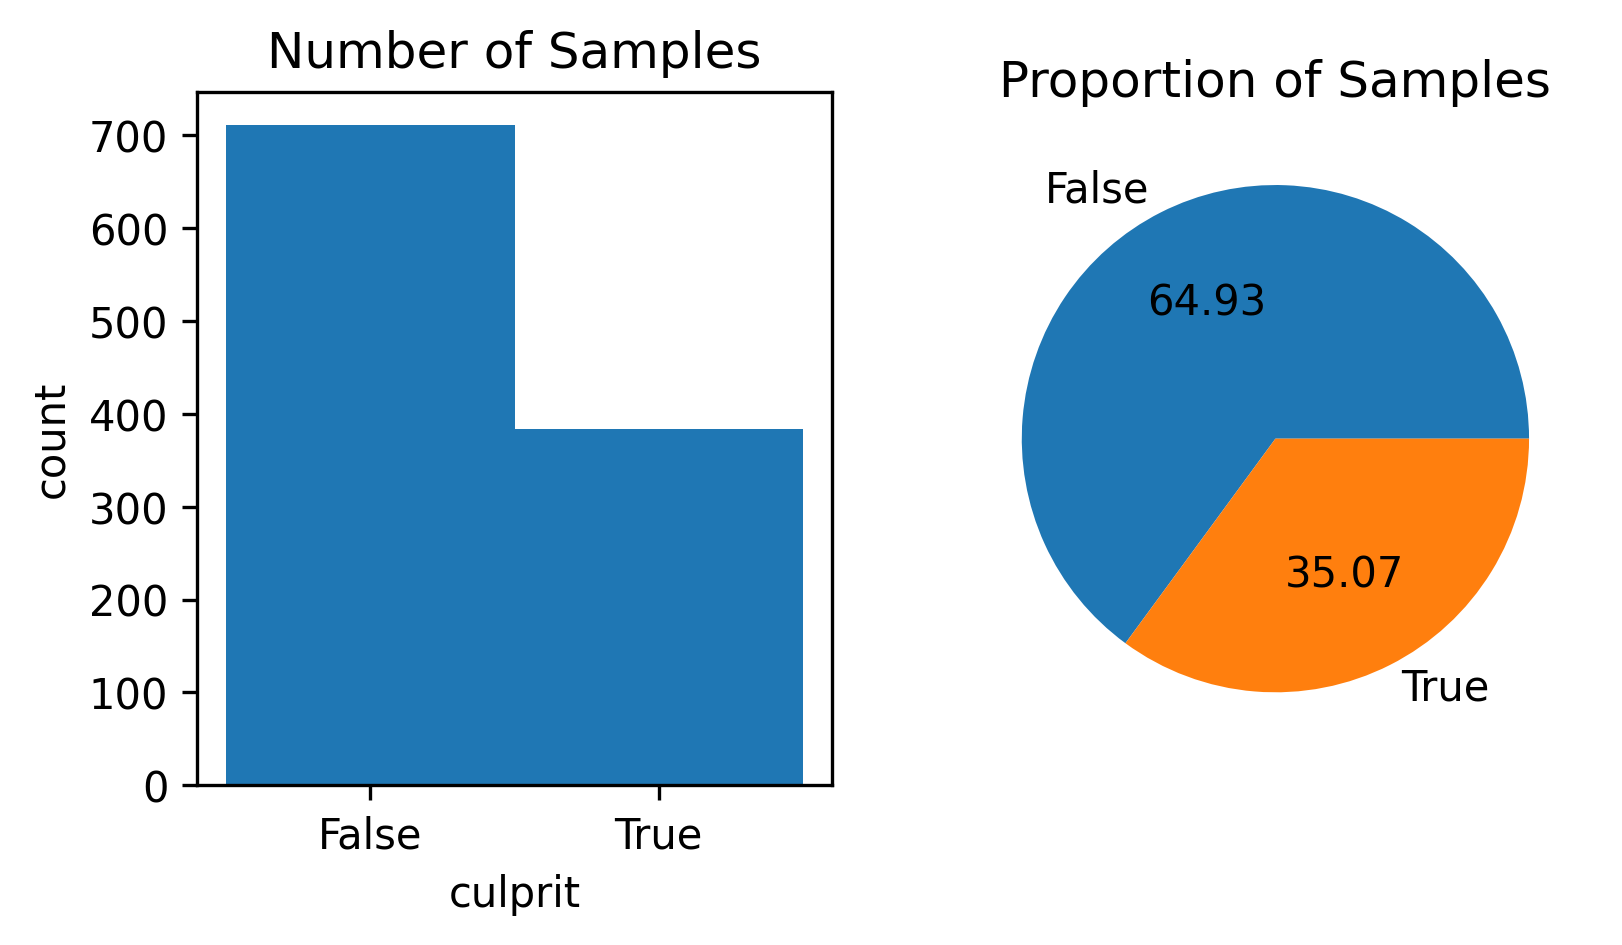

In [5]:
yX = df_all
y_feature_name = 'culprit'
X_feature_names = df_all.columns.tolist()
X_feature_names.remove(y_feature_name)

X = yX[X_feature_names]
y = yX[y_feature_name]

## 考察应变量y的分布（hist图、中值）
f,ax = plt.subplots(figsize=(6,3),dpi=300)
plt.subplot(1,2,1)
plt.hist(y,bins=2)
plt.xticks(ticks=[0.25,0.75],labels=[False,True])
plt.xlabel(y_feature_name)
plt.ylabel('count')
plt.title('Number of Samples')
## y分组的饼图
plt.subplot(1,2,2)
df = yX[y_feature_name].replace({0: 'False', 1: 'True'},inplace=False).value_counts()
plt.pie(df,labels=['False','True'],autopct='%.2f')
plt.title('Proportion of Samples')
fn = os.path.join(dir_result,'Distribution of Samples for Different Categories in the Dataset.png')
plt.savefig(fn, bbox_inches='tight')


# # 划分训练集和测试集
# （１）随机划分数据集
X_train = df_train.drop(columns=y_feature_name)
X_test = df_test.drop(columns=y_feature_name)
y_train = df_train.loc[:,[y_feature_name]]
y_test = df_test.loc[:,[y_feature_name]]

data_internal={'X_train':X_train,
                'y_train':y_train,
                'X_test':X_test,
                'y_test':y_test,
                'target_names':['False', 'True']
               }

# 训练与验证

In [11]:
#构建特征选择×分类算法组合AUC矩阵
feature_select_methods = ['MIC','RFE','EmbeddingLSVC','EmbeddingLR','EmbeddingTree','EmbeddingRF']
clf_names = ['Logistic', 'LDA', 'SVM', 'KNN', 'GaussianNB', 'DecisionTree',\
             'ExtraTrees', 'RandomForest', 'Bagging', 'AdaBoost', 'GradientBoost', 'MLP']

<Figure size 640x720 with 0 Axes>

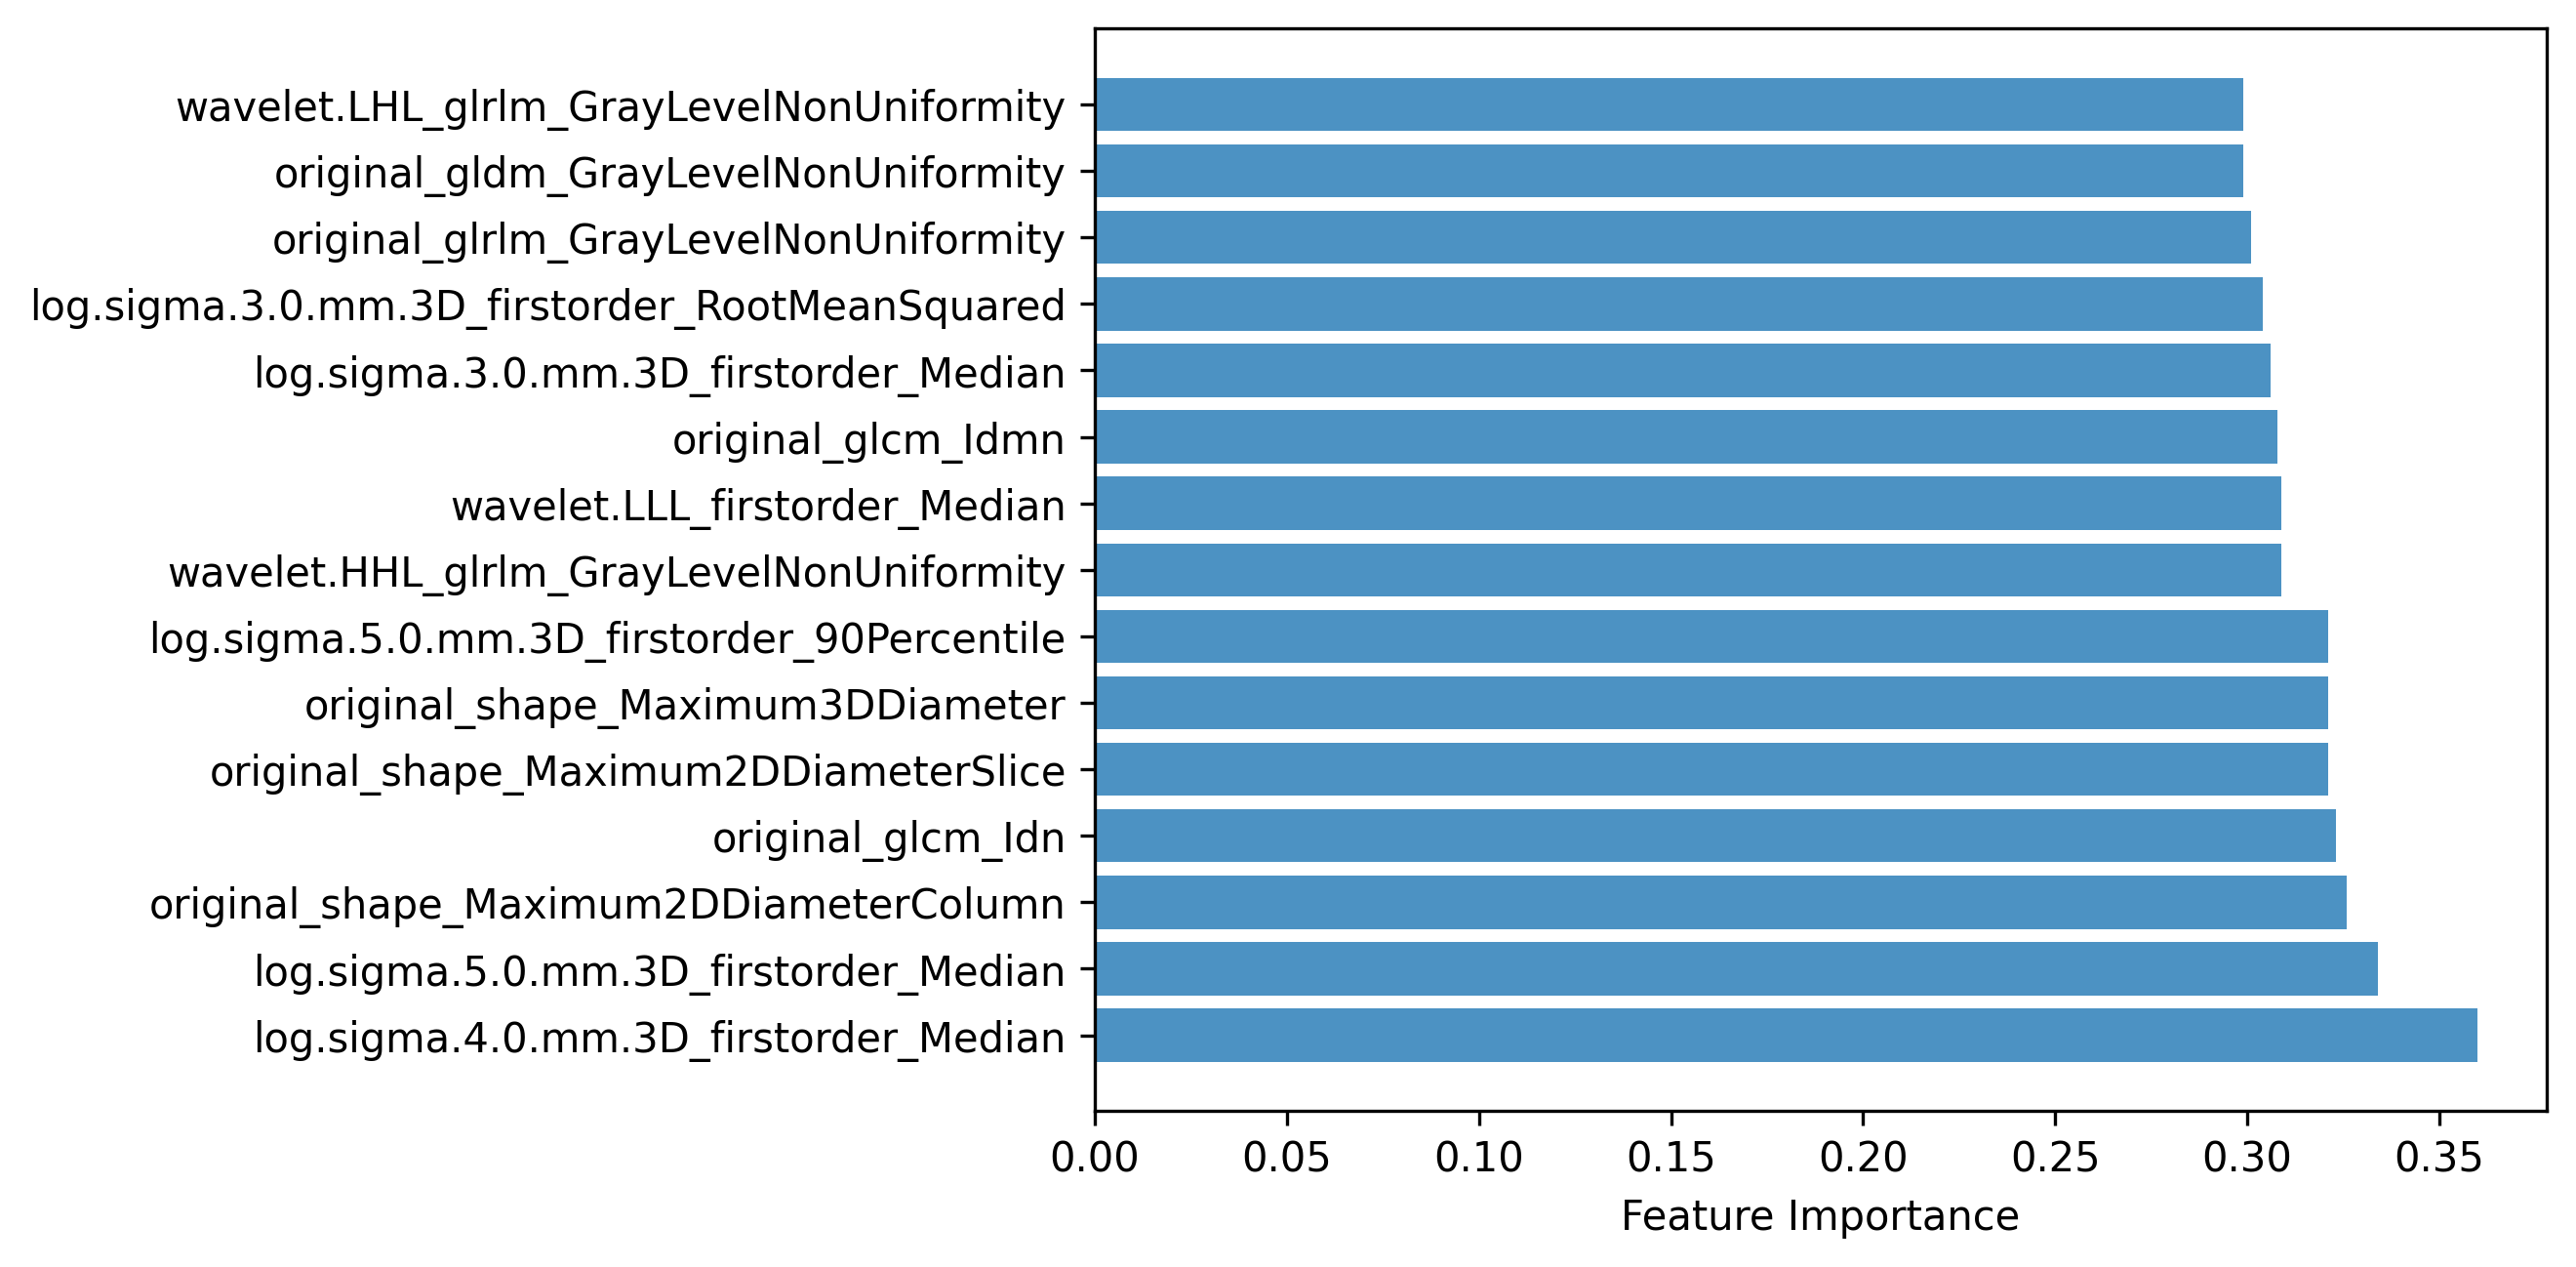

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running Logistic...
The model has been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.844   0.687      0.879   0.773     0.823  564.000
True            0.844   0.687      0.663   0.808     0.728  312.000
accuracy        0.785   0.785      0.785   0.785     0.785    0.785
macro avg       0.844   0.687      0.771   0.790     0.775  876.000
weighted avg    0.844   0.687      0.802   0.785     0.789  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.834   0.664      0.908   0.741     0.816  147.000
True            0.834   0.664      0.616   0.847     0.713   72.000
accuracy        0.776   0.776      0.776   0.776     0.776    0.776
macro avg       0.834   0.664      0.762   0.794     0.765  219.000
weighted avg    0.834   0.664      0.812   0.776     0.783  219.000

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
4 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 637, in fit
    self._solve_eigen(
  File "/opt/conda/lib/python3.8/site-packages/sklearn/discri

Running LDA...
The model has been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.845   0.691      0.795   0.869     0.831  564.000
True            0.845   0.691      0.715   0.596     0.650  312.000
accuracy        0.772   0.772      0.772   0.772     0.772    0.772
macro avg       0.845   0.691      0.755   0.732     0.740  876.000
weighted avg    0.845   0.691      0.767   0.772     0.766  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.831   0.662      0.815   0.837     0.826  147.000
True            0.831   0.662      0.647   0.611     0.629   72.000
accuracy        0.763   0.763      0.763   0.763     0.763    0.763
macro avg       0.831   0.662      0.731   0.724     0.727  219.000
weighted avg    0.831   0.662      0.759   0.763     0.761  219.000

Running SVM...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.875   0.752      0.862   0.853     0.857  564.000
True            0.875   0.752      0.739   0.753     0.746  312.000
accuracy        0.817   0.817      0.817   0.817     0.817    0.817
macro avg       0.875   0.752      0.801   0.803     0.802  876.000
weighted avg    0.875   0.752      0.818   0.817     0.818  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.841   0.662      0.885   0.837     0.860  147.000
True            0.841   0.662      0.700   0.778     0.737   72.000
accuracy        0.817   0.817      0.817   0.817     0.817    0.817
macro avg       0.841   0.662      0.792   0.807     0.798  219.000
weighted avg    0.841   0.662      0.824   0.817     0.820  219.000

Running KNN...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.892   0.774      0.827   0.888     0.856  564.000
True            0.892   0.774      0.767   0.663     0.711  312.000
accuracy        0.808   0.808      0.808   0.808     0.808    0.808
macro avg       0.892   0.774      0.797   0.776     0.784  876.000
weighted avg    0.892   0.774      0.805   0.808     0.805  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.838   0.670      0.841   0.864     0.852  147.000
True            0.838   0.670      0.706   0.667     0.686   72.000
accuracy        0.799   0.799      0.799   0.799     0.799    0.799
macro avg       0.838   0.670      0.773   0.765     0.769  219.000
weighted avg    0.838   0.670      0.797   0.799     0.798  219.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running GaussianNB...
The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.834   0.688      0.854   0.789     0.820  564.000
True            0.834   0.688      0.665   0.756     0.708  312.000
accuracy        0.777   0.777      0.777   0.777     0.777    0.777
macro avg       0.834   0.688      0.759   0.773     0.764  876.000
weighted avg    0.834   0.688      0.787   0.777     0.780  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.845   0.719      0.898   0.782     0.836  147.000
True            0.845   0.719      0.648   0.819     0.724   72.000
accuracy        0.795   0.795      0.795   0.795     0.795    0.795
macro avg       0.845   0.719      0.773   0.801     0.780  219.000
weighted avg    0.845   0.719      0.816   0.795     0.799  219.000

Running DecisionTree...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.893   0.803      0.935   0.715     0.810  564.000
True            0.893   0.803      0.638   0.910     0.750  312.000
accuracy        0.784   0.784      0.784   0.784     0.784    0.784
macro avg       0.893   0.803      0.787   0.812     0.780  876.000
weighted avg    0.893   0.803      0.829   0.784     0.789  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.807   0.623      0.901   0.619     0.734  147.000
True            0.807   0.623      0.525   0.861     0.653   72.000
accuracy        0.699   0.699      0.699   0.699     0.699    0.699
macro avg       0.807   0.623      0.713   0.740     0.693  219.000
weighted avg    0.807   0.623      0.778   0.699     0.707  219.000

Running ExtraTrees...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           1.000   1.000      0.988   1.000     0.994  564.000
True            1.000   1.000      1.000   0.978     0.989  312.000
accuracy        0.992   0.992      0.992   0.992     0.992    0.992
macro avg       1.000   1.000      0.994   0.989     0.991  876.000
weighted avg    1.000   1.000      0.992   0.992     0.992  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.859   0.697      0.879   0.837     0.857  147.000
True            0.859   0.697      0.696   0.764     0.728   72.000
accuracy        0.813   0.813      0.813   0.813     0.813    0.813
macro avg       0.859   0.697      0.787   0.800     0.793  219.000
weighted avg    0.859   0.697      0.819   0.813     0.815  219.000

Running RandomForest...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.908   0.841      0.871   0.858     0.864  564.000
True            0.908   0.841      0.750   0.769     0.759  312.000
accuracy        0.826   0.826      0.826   0.826     0.826    0.826
macro avg       0.908   0.841      0.810   0.814     0.812  876.000
weighted avg    0.908   0.841      0.828   0.826     0.827  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.864   0.767      0.877   0.823     0.849  147.000
True            0.864   0.767      0.679   0.764     0.719   72.000
accuracy        0.804   0.804      0.804   0.804     0.804    0.804
macro avg       0.864   0.767      0.778   0.794     0.784  219.000
weighted avg    0.864   0.767      0.812   0.804     0.806  219.000

Running Bagging...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.895   0.800      0.852   0.879     0.866  564.000
True            0.895   0.800      0.769   0.724     0.746  312.000
accuracy        0.824   0.824      0.824   0.824     0.824    0.824
macro avg       0.895   0.800      0.810   0.802     0.806  876.000
weighted avg    0.895   0.800      0.822   0.824     0.823  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.844   0.714      0.836   0.830     0.833  147.000
True            0.844   0.714      0.658   0.667     0.662   72.000
accuracy        0.776   0.776      0.776   0.776     0.776    0.776
macro avg       0.844   0.714      0.747   0.748     0.747  219.000
weighted avg    0.844   0.714      0.777   0.776     0.777  219.000

Running AdaBoost...


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py", line 151, in fit
    self._validate_estimator()
  File "/opt/conda/lib/python3.8/site-packages

The model has not been fit on the training dataset.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.760   0.612      0.736   0.918     0.817  564.000
True            0.760   0.612      0.733   0.404     0.521  312.000
accuracy        0.735   0.735      0.735   0.735     0.735    0.735
macro avg       0.760   0.612      0.734   0.661     0.669  876.000
weighted avg    0.760   0.612      0.735   0.735     0.711  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.820   0.708      0.798   0.912     0.851  147.000
True            0.820   0.708      0.745   0.528     0.618   72.000
accuracy        0.785   0.785      0.785   0.785     0.785    0.785
macro avg       0.820   0.708      0.771   0.720     0.734  219.000
weighted avg    0.820   0.708      0.780   0.785     0.774  219.000

Running GradientBoost...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.918   0.848      0.894   0.863     0.878  564.000
True            0.918   0.848      0.767   0.814     0.790  312.000
accuracy        0.846   0.846      0.846   0.846     0.846    0.846
macro avg       0.918   0.848      0.830   0.839     0.834  876.000
weighted avg    0.918   0.848      0.849   0.846     0.847  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.859   0.763      0.841   0.830     0.836  147.000
True            0.859   0.763      0.662   0.681     0.671   72.000
accuracy        0.781   0.781      0.781   0.781     0.781    0.781
macro avg       0.859   0.763      0.752   0.755     0.753  219.000
weighted avg    0.859   0.763      0.782   0.781     0.782  219.000

Running MLP...
The model has not been fit on the training dataset.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.856   0.729      0.871   0.817     0.844  564.000
True            0.856   0.729      0.703   0.782     0.741  312.000
accuracy        0.805   0.805      0.805   0.805     0.805    0.805
macro avg       0.856   0.729      0.787   0.800     0.792  876.000
weighted avg    0.856   0.729      0.812   0.805     0.807  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.841   0.682      0.898   0.782     0.836  147.000
True            0.841   0.682      0.648   0.819     0.724   72.000
accuracy        0.795   0.795      0.795   0.795     0.795    0.795
macro avg       0.841   0.682      0.773   0.801     0.780  219.000
weighted avg    0.841   0.682      0.816   0.795     0.799  219.000

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

<Figure size 640x480 with 0 Axes>

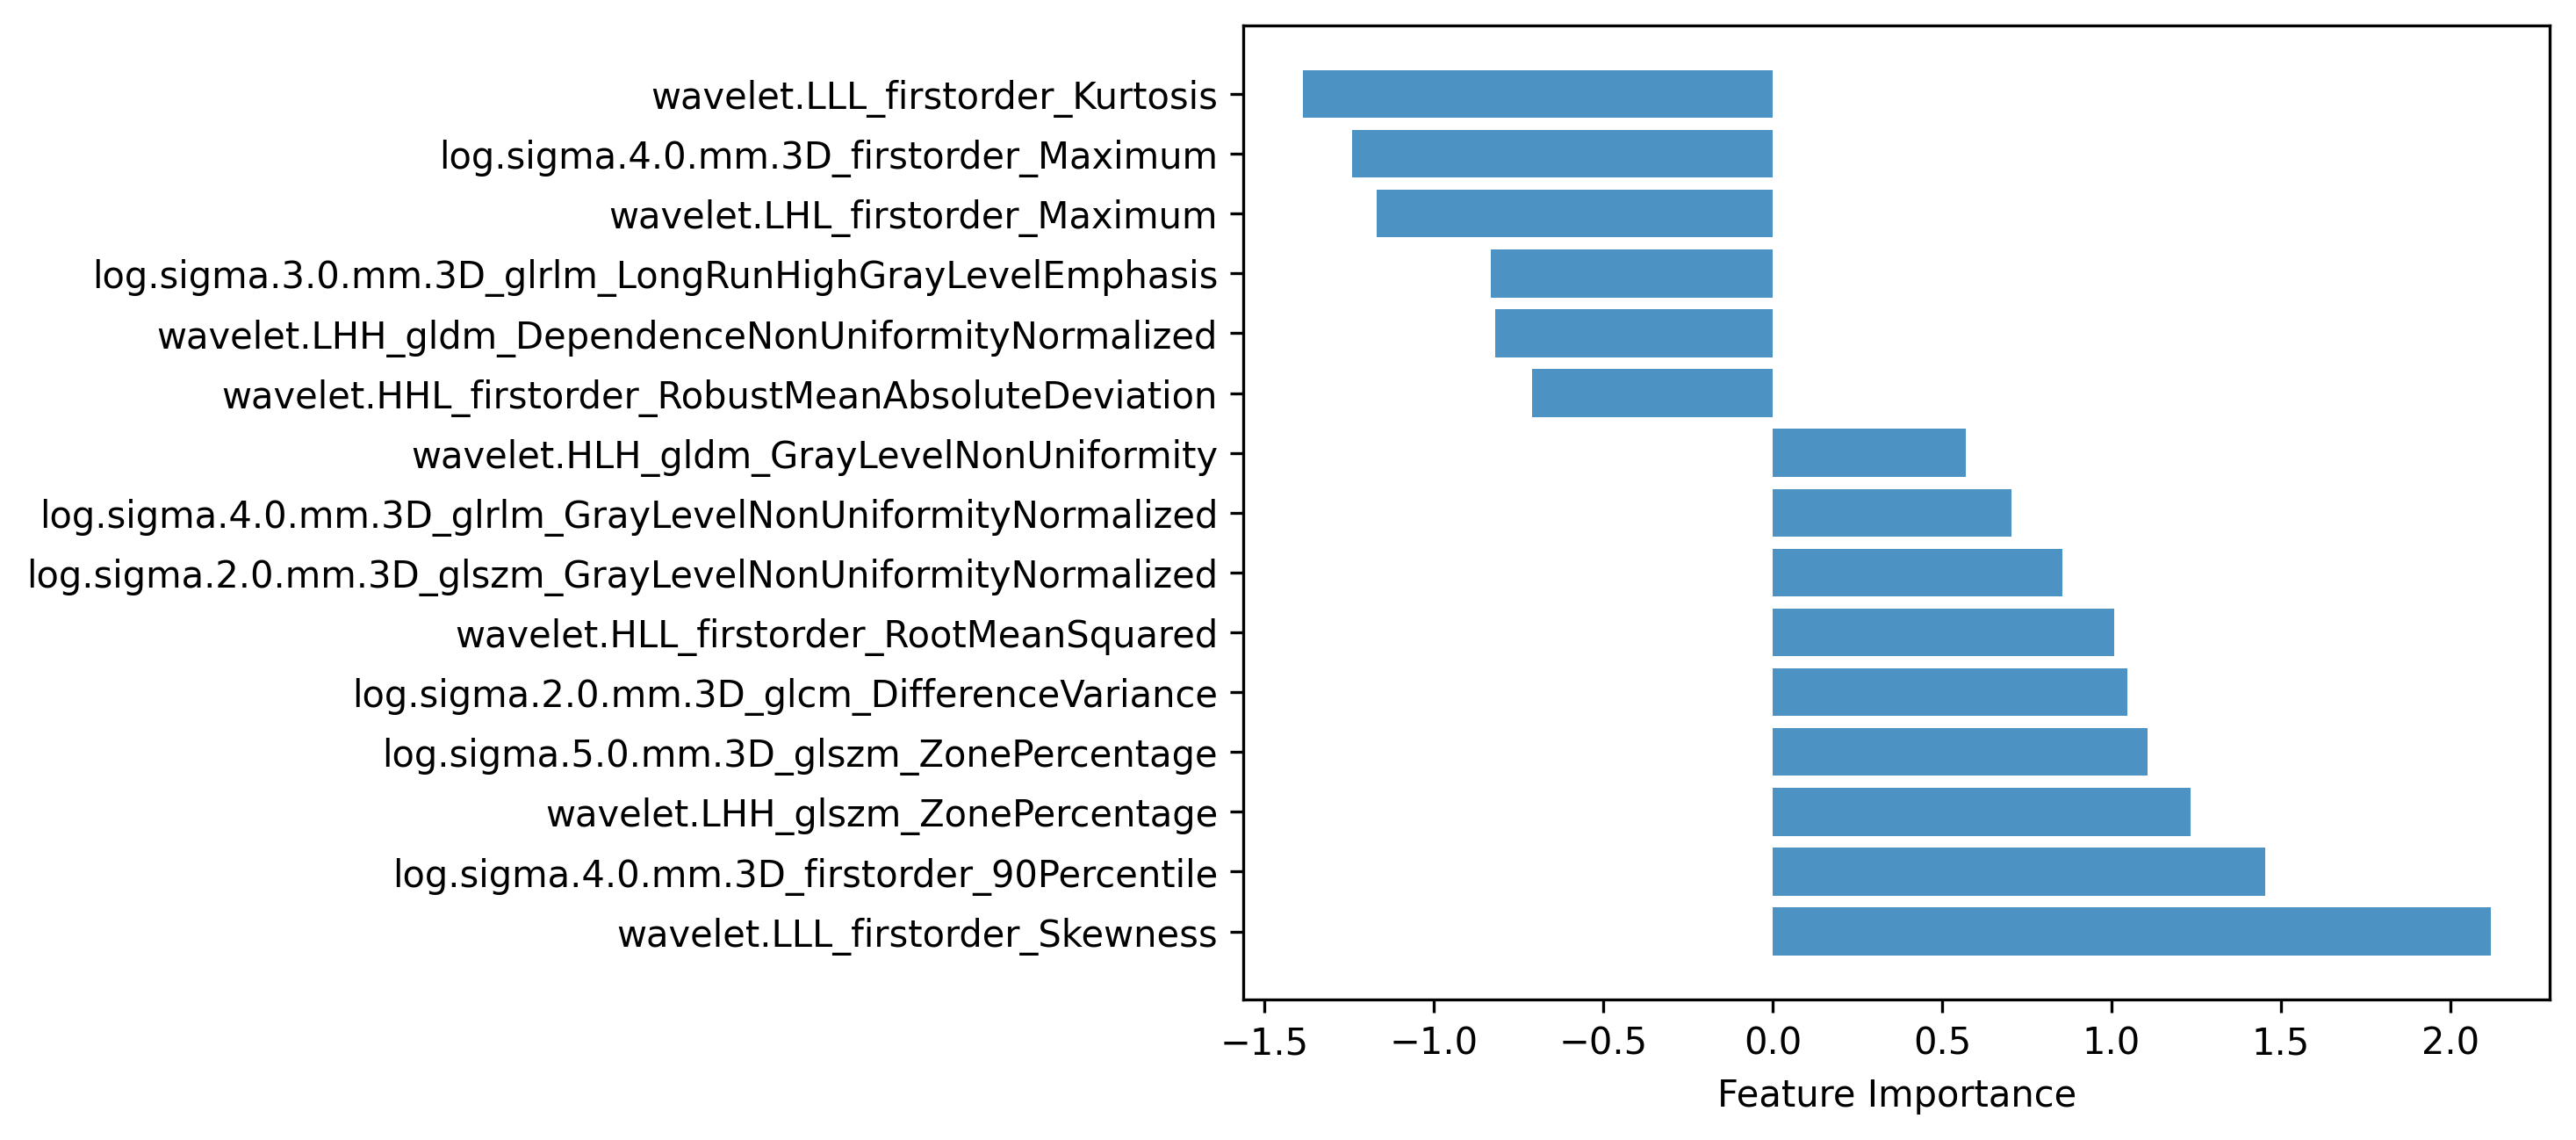

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running Logistic...
The model has been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.896   0.826      0.847   0.856     0.852  564.000
True            0.896   0.826      0.735   0.721     0.728  312.000
accuracy        0.808   0.808      0.808   0.808     0.808    0.808
macro avg       0.896   0.826      0.791   0.789     0.790  876.000
weighted avg    0.896   0.826      0.807   0.808     0.808  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.897   0.762      0.884   0.878     0.881   147.00
True            0.897   0.762      0.753   0.764     0.759    72.00
accuracy        0.840   0.840      0.840   0.840     0.840     0.84
macro avg       0.897   0.762      0.818   0.821     0.820   219.00
weighted avg    0.897   0.762      0.841   0.840     0.840   219.00

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running LDA...
The model has been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.894   0.821      0.844   0.856     0.850  564.000
True            0.894   0.821      0.734   0.715     0.724  312.000
accuracy        0.806   0.806      0.806   0.806     0.806    0.806
macro avg       0.894   0.821      0.789   0.786     0.787  876.000
weighted avg    0.894   0.821      0.805   0.806     0.805  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.895   0.771      0.870   0.864     0.867  147.000
True            0.895   0.771      0.726   0.736     0.731   72.000
accuracy        0.822   0.822      0.822   0.822     0.822    0.822
macro avg       0.895   0.771      0.798   0.800     0.799  219.000
weighted avg    0.895   0.771      0.823   0.822     0.822  219.000

Running SVM...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.928   0.879      0.880   0.888     0.884   564.00
True            0.928   0.879      0.795   0.782     0.788   312.00
accuracy        0.850   0.850      0.850   0.850     0.850     0.85
macro avg       0.928   0.879      0.838   0.835     0.836   876.00
weighted avg    0.928   0.879      0.850   0.850     0.850   876.00

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.894   0.734      0.853   0.871     0.862  147.000
True            0.894   0.734      0.725   0.694     0.709   72.000
accuracy        0.813   0.813      0.813   0.813     0.813    0.813
macro avg       0.894   0.734      0.789   0.783     0.786  219.000
weighted avg    0.894   0.734      0.811   0.813     0.812  219.000

Running KNN...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.898   0.806      0.832   0.902     0.866   564.00
True            0.898   0.806      0.792   0.670     0.726   312.00
accuracy        0.820   0.820      0.820   0.820     0.820     0.82
macro avg       0.898   0.806      0.812   0.786     0.796   876.00
weighted avg    0.898   0.806      0.817   0.820     0.816   876.00

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.842   0.666      0.787   0.878     0.830  147.000
True            0.842   0.666      0.673   0.514     0.583   72.000
accuracy        0.758   0.758      0.758   0.758     0.758    0.758
macro avg       0.842   0.666      0.730   0.696     0.706  219.000
weighted avg    0.842   0.666      0.749   0.758     0.748  219.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running GaussianNB...
The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.822   0.650      0.787   0.846     0.815  564.000
True            0.822   0.650      0.678   0.587     0.629  312.000
accuracy        0.753   0.753      0.753   0.753     0.753    0.753
macro avg       0.822   0.650      0.732   0.716     0.722  876.000
weighted avg    0.822   0.650      0.748   0.753     0.749  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.826   0.609      0.829   0.823     0.826  147.000
True            0.826   0.609      0.644   0.653     0.648   72.000
accuracy        0.767   0.767      0.767   0.767     0.767    0.767
macro avg       0.826   0.609      0.736   0.738     0.737  219.000
weighted avg    0.826   0.609      0.768   0.767     0.768  219.000

Running DecisionTree...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.889   0.780      0.931   0.722     0.813  564.000
True            0.889   0.780      0.642   0.904     0.751  312.000
accuracy        0.787   0.787      0.787   0.787     0.787    0.787
macro avg       0.889   0.780      0.787   0.813     0.782  876.000
weighted avg    0.889   0.780      0.828   0.787     0.791  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.827   0.642      0.914   0.653     0.762  147.000
True            0.827   0.642      0.553   0.875     0.677   72.000
accuracy        0.726   0.726      0.726   0.726     0.726    0.726
macro avg       0.827   0.642      0.733   0.764     0.720  219.000
weighted avg    0.827   0.642      0.795   0.726     0.734  219.000

Running ExtraTrees...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           1.000   1.000      0.988   1.000     0.994  564.000
True            1.000   1.000      1.000   0.978     0.989  312.000
accuracy        0.992   0.992      0.992   0.992     0.992    0.992
macro avg       1.000   1.000      0.994   0.989     0.991  876.000
weighted avg    1.000   1.000      0.992   0.992     0.992  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.865   0.681      0.826   0.871     0.848   147.00
True            0.865   0.681      0.703   0.625     0.662    72.00
accuracy        0.790   0.790      0.790   0.790     0.790     0.79
macro avg       0.865   0.681      0.764   0.748     0.755   219.00
weighted avg    0.865   0.681      0.785   0.790     0.787   219.00

Running RandomForest...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.960   0.937      0.900   0.945     0.922  564.000
True            0.960   0.937      0.891   0.811     0.849  312.000
accuracy        0.897   0.897      0.897   0.897     0.897    0.897
macro avg       0.960   0.937      0.896   0.878     0.886  876.000
weighted avg    0.960   0.937      0.897   0.897     0.896  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.858   0.717      0.840   0.823     0.832  147.000
True            0.858   0.717      0.653   0.681     0.667   72.000
accuracy        0.776   0.776      0.776   0.776     0.776    0.776
macro avg       0.858   0.717      0.747   0.752     0.749  219.000
weighted avg    0.858   0.717      0.779   0.776     0.777  219.000

Running Bagging...
The model has not been fit on the training dataset.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.896   0.826      0.850   0.862     0.856  564.000
True            0.896   0.826      0.743   0.724     0.734  312.000
accuracy        0.813   0.813      0.813   0.813     0.813    0.813
macro avg       0.896   0.826      0.797   0.793     0.795  876.000
weighted avg    0.896   0.826      0.812   0.813     0.812  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.898   0.772      0.878   0.878     0.878  147.000
True            0.898   0.772      0.750   0.750     0.750   72.000
accuracy        0.836   0.836      0.836   0.836     0.836    0.836
macro avg       0.898   0.772      0.814   0.814     0.814  219.000
weighted avg    0.898   0.772      0.836   0.836     0.836  219.000

Running AdaBoost...


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py", line 151, in fit
    self._validate_estimator()
  File "/opt/conda/lib/python3.8/site-packages

The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.888   0.807      0.828   0.871     0.849    564.0
True            0.888   0.807      0.742   0.673     0.706    312.0
accuracy        0.800   0.800      0.800   0.800     0.800      0.8
macro avg       0.888   0.807      0.785   0.772     0.777    876.0
weighted avg    0.888   0.807      0.797   0.800     0.798    876.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.895   0.742      0.872   0.884     0.878  147.000
True            0.895   0.742      0.757   0.736     0.746   72.000
accuracy        0.836   0.836      0.836   0.836     0.836    0.836
macro avg       0.895   0.742      0.815   0.810     0.812  219.000
weighted avg    0.895   0.742      0.835   0.836     0.835  219.000

Running GradientBoost...
The model has not been fit on the training dataset.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.985   0.977      0.943   0.961     0.952  564.000
True            0.985   0.977      0.927   0.894     0.910  312.000
accuracy        0.937   0.937      0.937   0.937     0.937    0.937
macro avg       0.985   0.977      0.935   0.928     0.931  876.000
weighted avg    0.985   0.977      0.937   0.937     0.937  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.860   0.696      0.842   0.871     0.856  147.000
True            0.860   0.696      0.716   0.667     0.691   72.000
accuracy        0.804   0.804      0.804   0.804     0.804    0.804
macro avg       0.860   0.696      0.779   0.769     0.773  219.000
weighted avg    0.860   0.696      0.801   0.804     0.802  219.000

Running MLP...
The model has not been fit on the training dataset.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.911   0.853      0.877   0.849     0.863  564.000
True            0.911   0.853      0.742   0.785     0.763  312.000
accuracy        0.826   0.826      0.826   0.826     0.826    0.826
macro avg       0.911   0.853      0.810   0.817     0.813  876.000
weighted avg    0.911   0.853      0.829   0.826     0.828  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.894   0.768      0.874   0.850     0.862  147.000
True            0.894   0.768      0.711   0.750     0.730   72.000
accuracy        0.817   0.817      0.817   0.817     0.817    0.817
macro avg       0.894   0.768      0.792   0.800     0.796  219.000
weighted avg    0.894   0.768      0.820   0.817     0.819  219.000

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<Figure size 640x720 with 0 Axes>

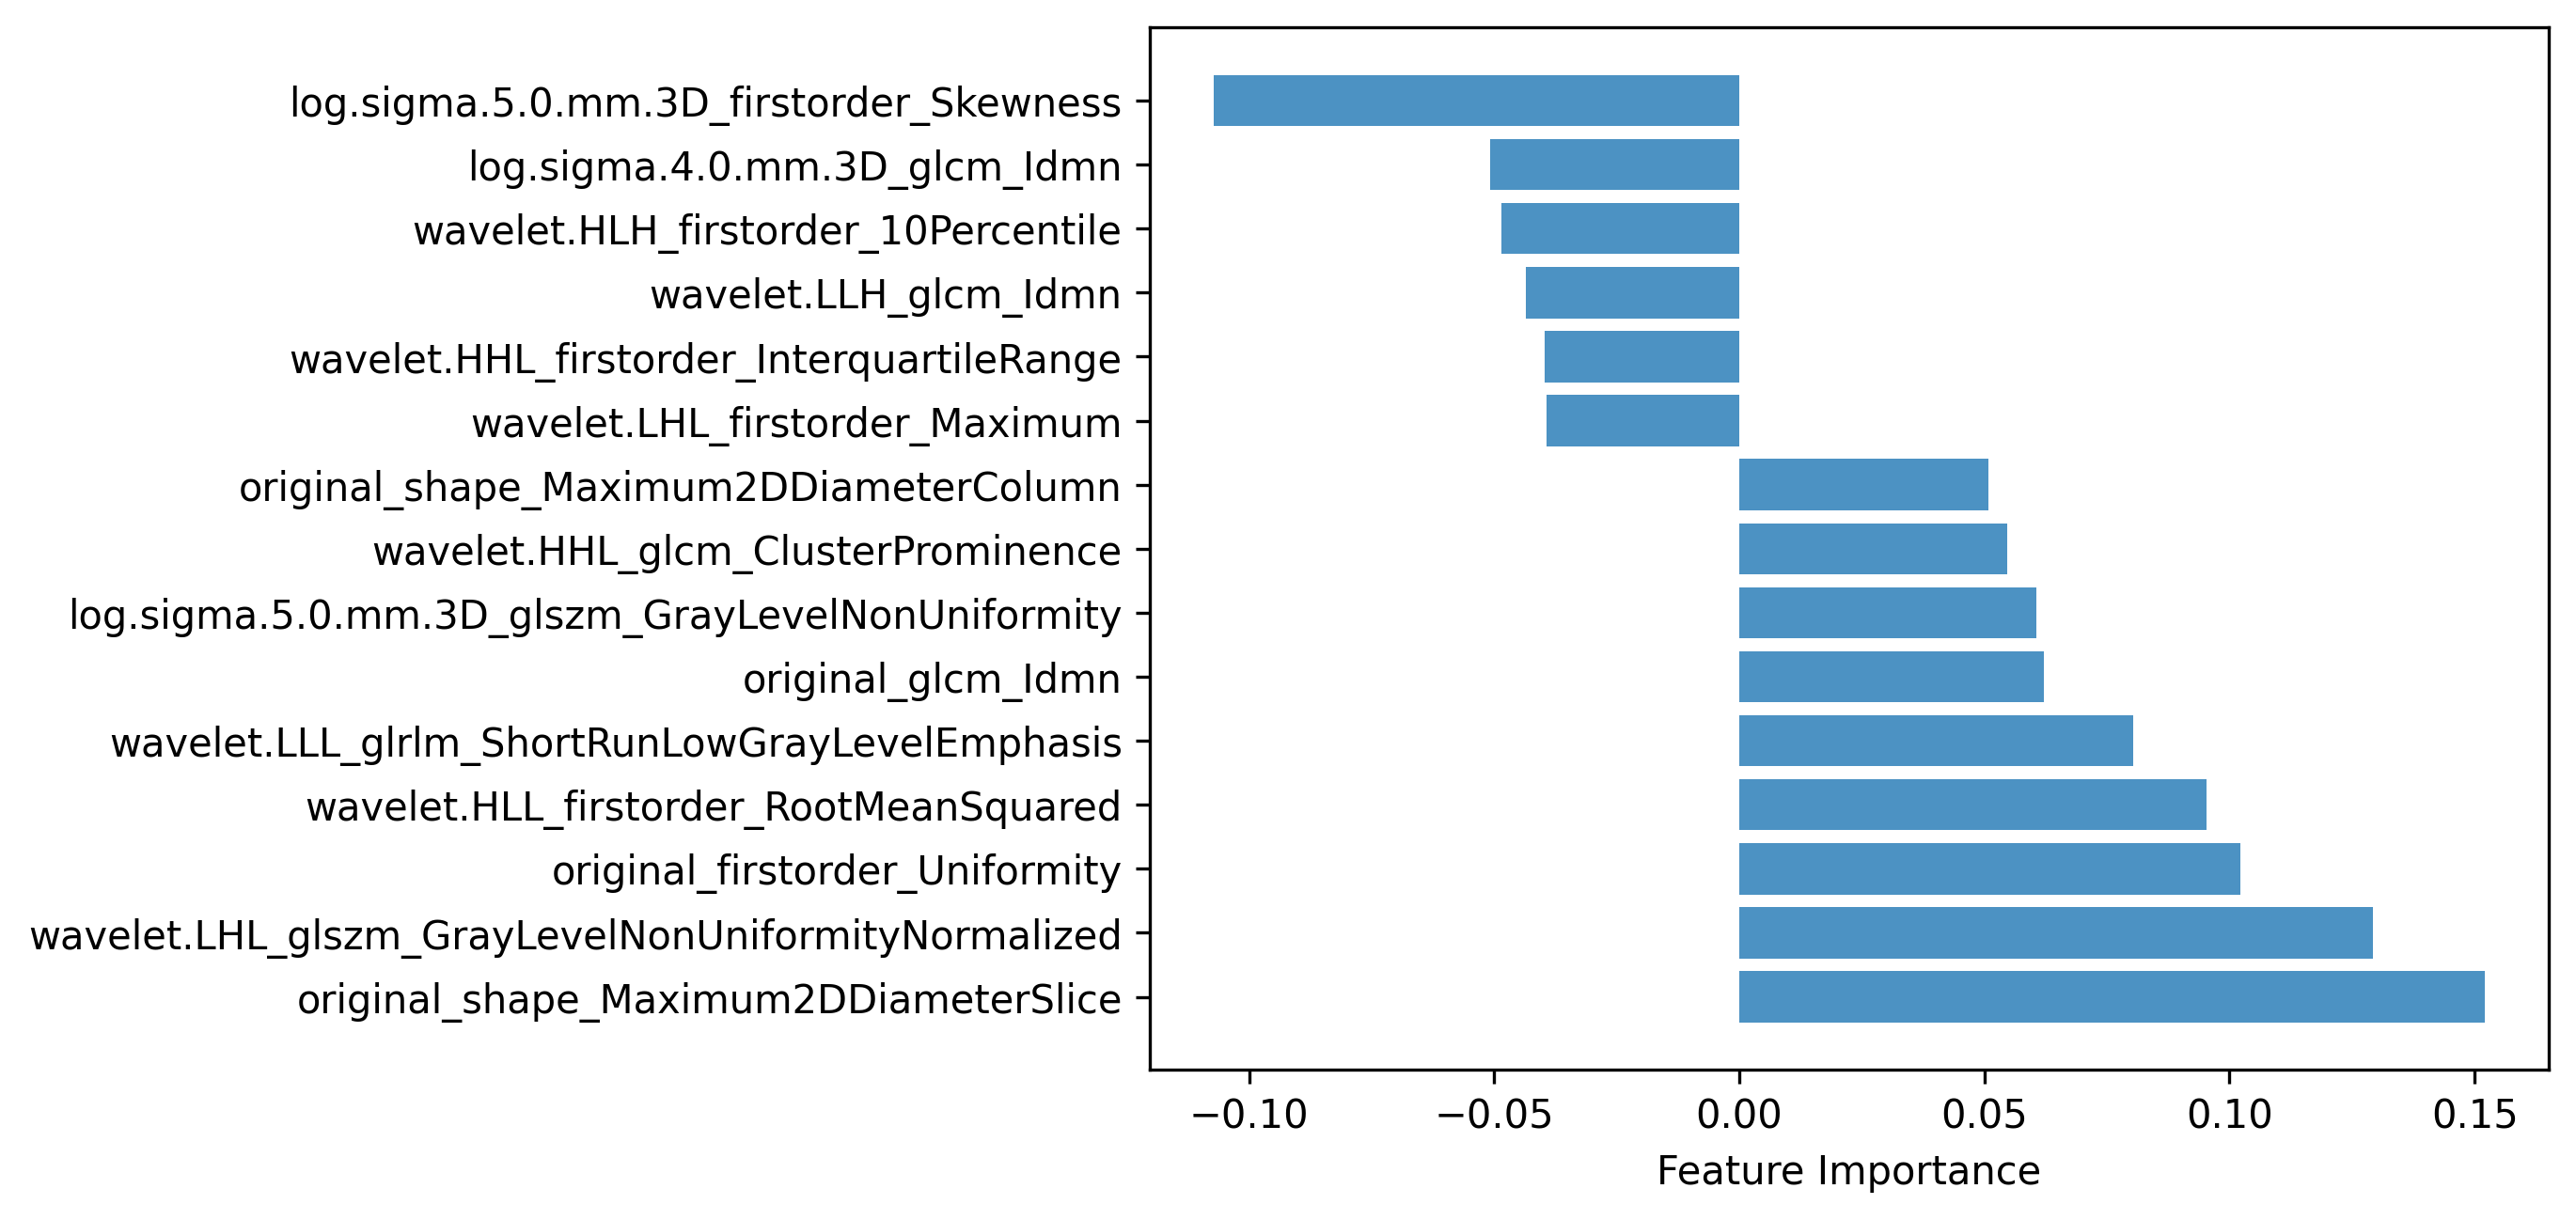

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running Logistic...
The model has been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.893   0.796      0.900   0.798     0.846  564.000
True            0.893   0.796      0.697   0.840     0.762  312.000
accuracy        0.813   0.813      0.813   0.813     0.813    0.813
macro avg       0.893   0.796      0.798   0.819     0.804  876.000
weighted avg    0.893   0.796      0.828   0.813     0.816  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.914   0.772      0.925   0.837     0.879  147.000
True            0.914   0.772      0.721   0.861     0.785   72.000
accuracy        0.845   0.845      0.845   0.845     0.845    0.845
macro avg       0.914   0.772      0.823   0.849     0.832  219.000
weighted avg    0.914   0.772      0.858   0.845     0.848  219.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running LDA...
The model has been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.893   0.794      0.846   0.856     0.851  564.000
True            0.893   0.794      0.734   0.718     0.726  312.000
accuracy        0.807   0.807      0.807   0.807     0.807    0.807
macro avg       0.893   0.794      0.790   0.787     0.789  876.000
weighted avg    0.893   0.794      0.806   0.807     0.807  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.917   0.778      0.861   0.884     0.872  147.000
True            0.917   0.778      0.750   0.708     0.729   72.000
accuracy        0.826   0.826      0.826   0.826     0.826    0.826
macro avg       0.917   0.778      0.805   0.796     0.801  219.000
weighted avg    0.917   0.778      0.824   0.826     0.825  219.000

Running SVM...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.924   0.847      0.914   0.848     0.879   564.00
True            0.924   0.847      0.756   0.856     0.803   312.00
accuracy        0.850   0.850      0.850   0.850     0.850     0.85
macro avg       0.924   0.847      0.835   0.852     0.841   876.00
weighted avg    0.924   0.847      0.858   0.850     0.852   876.00

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.920   0.855      0.914   0.864     0.888  147.000
True            0.920   0.855      0.750   0.833     0.789   72.000
accuracy        0.854   0.854      0.854   0.854     0.854    0.854
macro avg       0.920   0.855      0.832   0.849     0.839  219.000
weighted avg    0.920   0.855      0.860   0.854     0.856  219.000

Running KNN...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.909   0.804      0.838   0.887     0.861  564.000
True            0.909   0.804      0.771   0.689     0.728  312.000
accuracy        0.816   0.816      0.816   0.816     0.816    0.816
macro avg       0.909   0.804      0.804   0.788     0.794  876.000
weighted avg    0.909   0.804      0.814   0.816     0.814  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.898   0.777      0.821   0.905     0.861  147.000
True            0.898   0.777      0.754   0.597     0.667   72.000
accuracy        0.804   0.804      0.804   0.804     0.804    0.804
macro avg       0.898   0.777      0.788   0.751     0.764  219.000
weighted avg    0.898   0.777      0.799   0.804     0.797  219.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running GaussianNB...
The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.868   0.749      0.827   0.849     0.838  564.000
True            0.868   0.749      0.714   0.679     0.696  312.000
accuracy        0.789   0.789      0.789   0.789     0.789    0.789
macro avg       0.868   0.749      0.771   0.764     0.767  876.000
weighted avg    0.868   0.749      0.787   0.789     0.788  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.868   0.693      0.851   0.857     0.854  147.000
True            0.868   0.693      0.704   0.694     0.699   72.000
accuracy        0.804   0.804      0.804   0.804     0.804    0.804
macro avg       0.868   0.693      0.778   0.776     0.777  219.000
weighted avg    0.868   0.693      0.803   0.804     0.803  219.000

Running DecisionTree...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.925   0.867      0.860   0.894     0.877  564.000
True            0.925   0.867      0.793   0.737     0.764  312.000
accuracy        0.838   0.838      0.838   0.838     0.838    0.838
macro avg       0.925   0.867      0.827   0.815     0.820  876.000
weighted avg    0.925   0.867      0.836   0.838     0.836  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.818   0.658      0.804   0.810     0.807   147.00
True            0.818   0.658      0.606   0.597     0.601    72.00
accuracy        0.740   0.740      0.740   0.740     0.740     0.74
macro avg       0.818   0.658      0.705   0.703     0.704   219.00
weighted avg    0.818   0.658      0.739   0.740     0.739   219.00

Running ExtraTrees...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           1.000   1.000      0.988   1.000     0.994  564.000
True            1.000   1.000      1.000   0.978     0.989  312.000
accuracy        0.992   0.992      0.992   0.992     0.992    0.992
macro avg       1.000   1.000      0.994   0.989     0.991  876.000
weighted avg    1.000   1.000      0.992   0.992     0.992  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.890   0.741      0.837   0.871     0.853  147.000
True            0.890   0.741      0.712   0.653     0.681   72.000
accuracy        0.799   0.799      0.799   0.799     0.799    0.799
macro avg       0.890   0.741      0.774   0.762     0.767  219.000
weighted avg    0.890   0.741      0.796   0.799     0.797  219.000

Running RandomForest...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.925   0.866      0.878   0.871     0.874  564.000
True            0.925   0.866      0.770   0.782     0.776  312.000
accuracy        0.839   0.839      0.839   0.839     0.839    0.839
macro avg       0.925   0.866      0.824   0.826     0.825  876.000
weighted avg    0.925   0.866      0.840   0.839     0.839  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.887   0.792      0.845   0.850     0.847  147.000
True            0.887   0.792      0.690   0.681     0.685   72.000
accuracy        0.795   0.795      0.795   0.795     0.795    0.795
macro avg       0.887   0.792      0.767   0.765     0.766  219.000
weighted avg    0.887   0.792      0.794   0.795     0.794  219.000

Running Bagging...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.892   0.794      0.899   0.801     0.847  564.000
True            0.892   0.794      0.700   0.837     0.762  312.000
accuracy        0.814   0.814      0.814   0.814     0.814    0.814
macro avg       0.892   0.794      0.799   0.819     0.805  876.000
weighted avg    0.892   0.794      0.828   0.814     0.817  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.913   0.773      0.911   0.837     0.872  147.000
True            0.913   0.773      0.714   0.833     0.769   72.000
accuracy        0.836   0.836      0.836   0.836     0.836    0.836
macro avg       0.913   0.773      0.813   0.835     0.821  219.000
weighted avg    0.913   0.773      0.846   0.836     0.838  219.000

Running AdaBoost...


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py", line 151, in fit
    self._validate_estimator()
  File "/opt/conda/lib/python3.8/site-packages

The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.891   0.797      0.893   0.785     0.836  564.000
True            0.891   0.797      0.682   0.830     0.749  312.000
accuracy        0.801   0.801      0.801   0.801     0.801    0.801
macro avg       0.891   0.797      0.787   0.808     0.792  876.000
weighted avg    0.891   0.797      0.818   0.801     0.805  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.914   0.778      0.917   0.830     0.871  147.000
True            0.914   0.778      0.709   0.847     0.772   72.000
accuracy        0.836   0.836      0.836   0.836     0.836    0.836
macro avg       0.914   0.778      0.813   0.839     0.822  219.000
weighted avg    0.914   0.778      0.849   0.836     0.839  219.000

Running GradientBoost...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.927   0.878      0.879   0.867     0.873  564.000
True            0.927   0.878      0.766   0.785     0.775  312.000
accuracy        0.838   0.838      0.838   0.838     0.838    0.838
macro avg       0.927   0.878      0.823   0.826     0.824  876.000
weighted avg    0.927   0.878      0.839   0.838     0.838  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.901   0.831      0.850   0.850     0.850  147.000
True            0.901   0.831      0.694   0.694     0.694   72.000
accuracy        0.799   0.799      0.799   0.799     0.799    0.799
macro avg       0.901   0.831      0.772   0.772     0.772  219.000
weighted avg    0.901   0.831      0.799   0.799     0.799  219.000

Running MLP...
The model has not been fit on the training dataset.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.904   0.821      0.864   0.846     0.855  564.000
True            0.904   0.821      0.731   0.760     0.745  312.000
accuracy        0.815   0.815      0.815   0.815     0.815    0.815
macro avg       0.904   0.821      0.798   0.803     0.800  876.000
weighted avg    0.904   0.821      0.817   0.815     0.816  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.910   0.804      0.878   0.878     0.878  147.000
True            0.910   0.804      0.750   0.750     0.750   72.000
accuracy        0.836   0.836      0.836   0.836     0.836    0.836
macro avg       0.910   0.804      0.814   0.814     0.814  219.000
weighted avg    0.910   0.804      0.836   0.836     0.836  219.000

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 640x720 with 0 Axes>

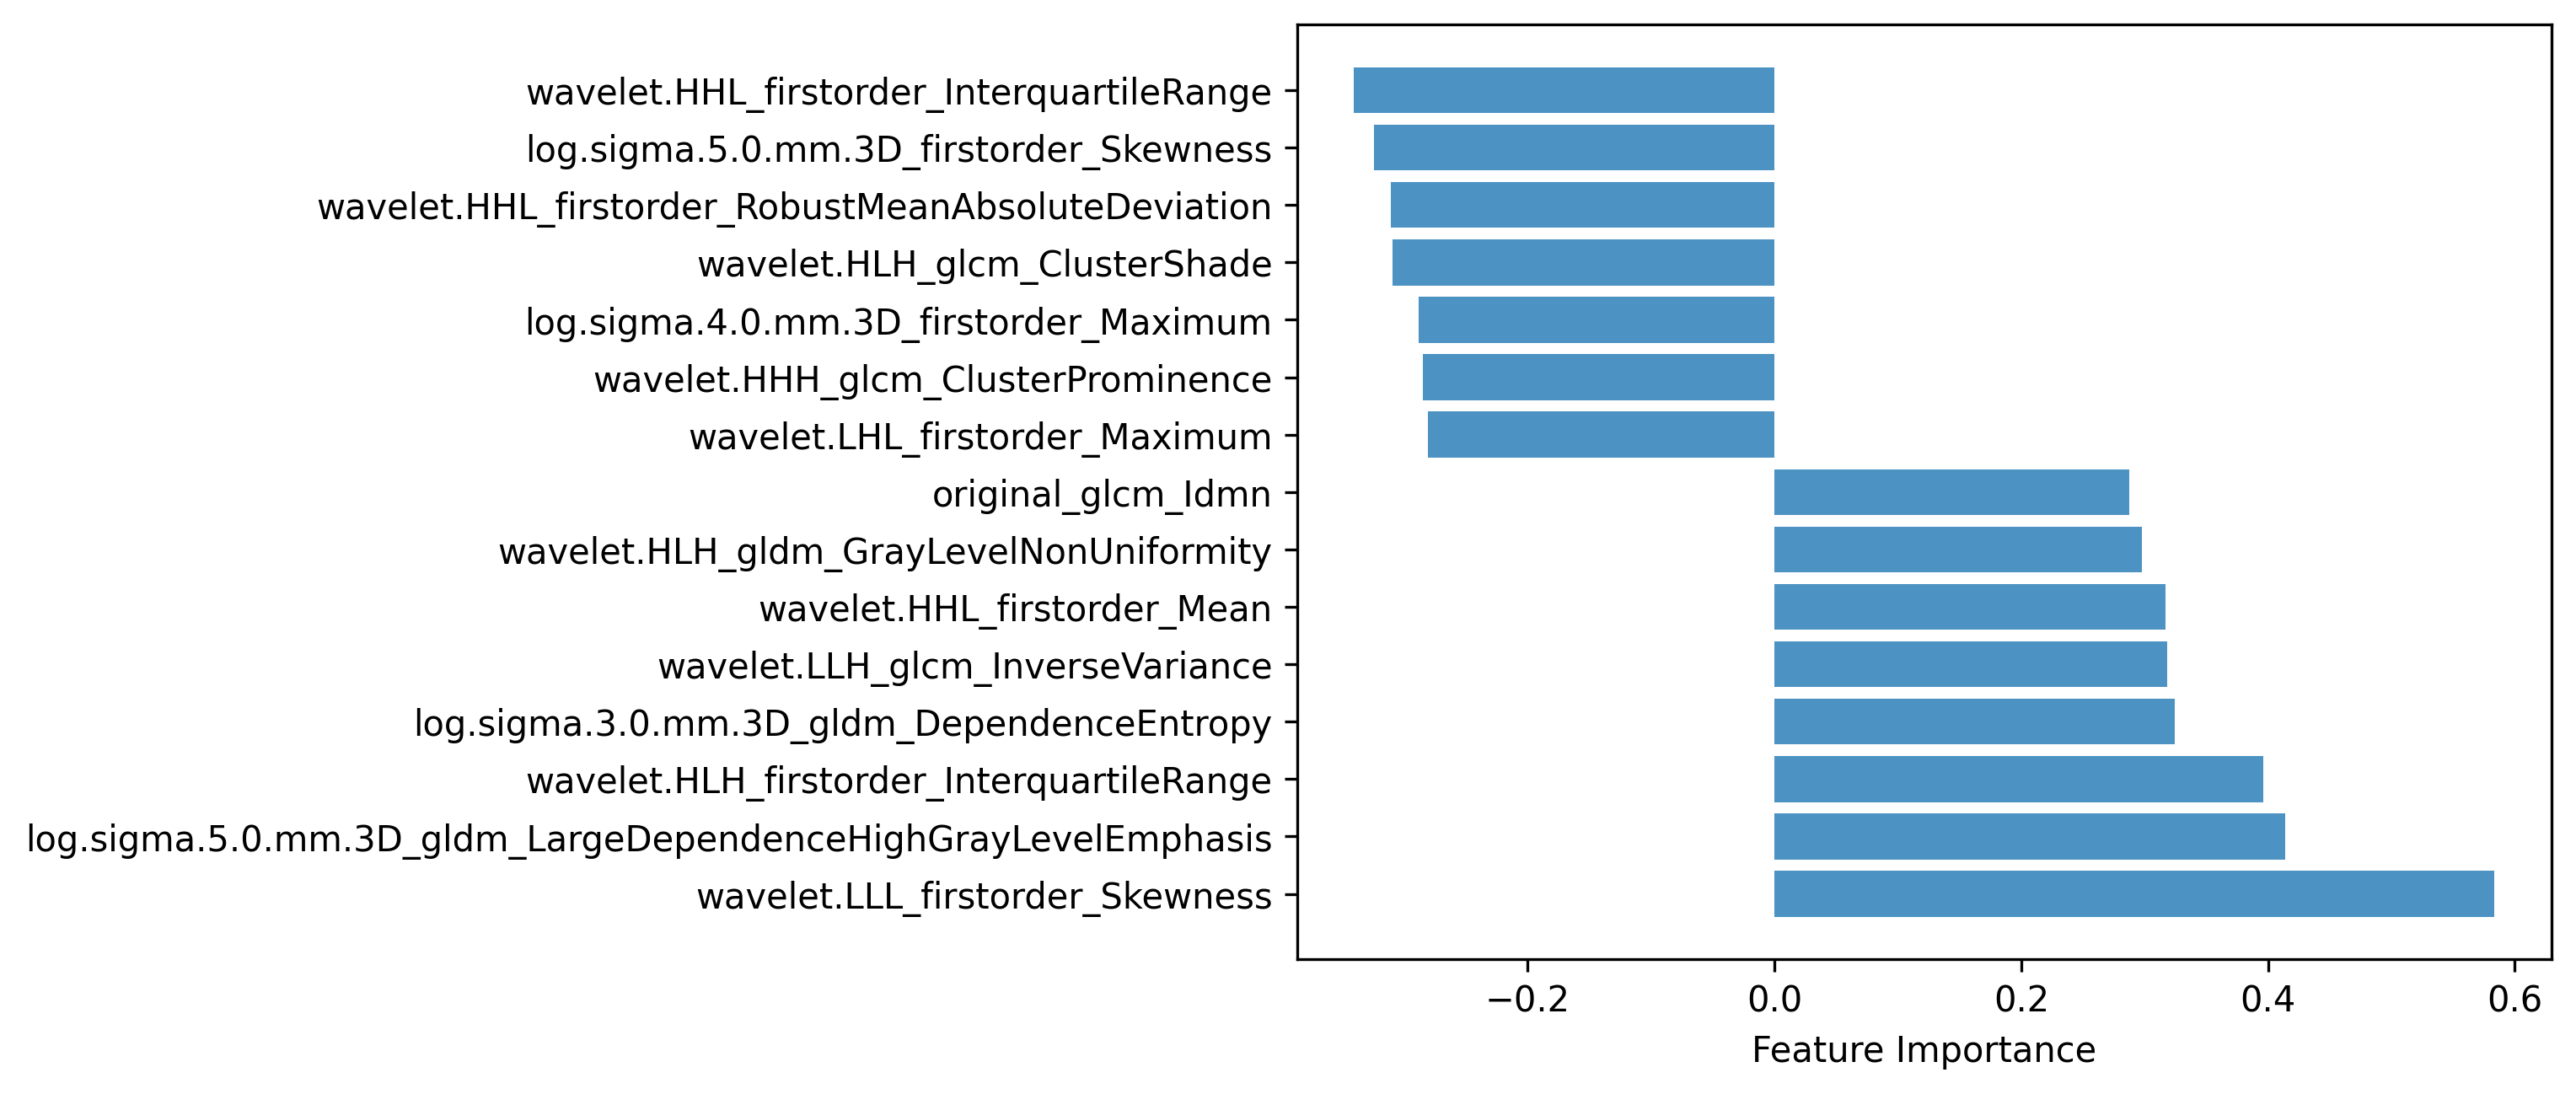

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running Logistic...
The model has been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.845   0.701      0.860   0.754     0.803  564.000
True            0.845   0.701      0.636   0.779     0.700  312.000
accuracy        0.763   0.763      0.763   0.763     0.763    0.763
macro avg       0.845   0.701      0.748   0.766     0.752  876.000
weighted avg    0.845   0.701      0.780   0.763     0.767  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.848   0.689      0.878   0.735     0.800  147.000
True            0.848   0.689      0.594   0.792     0.679   72.000
accuracy        0.753   0.753      0.753   0.753     0.753    0.753
macro avg       0.848   0.689      0.736   0.763     0.739  219.000
weighted avg    0.848   0.689      0.785   0.753     0.760  219.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running LDA...
The model has been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.846   0.704      0.812   0.828     0.820  564.000
True            0.846   0.704      0.678   0.654     0.666  312.000
accuracy        0.766   0.766      0.766   0.766     0.766    0.766
macro avg       0.846   0.704      0.745   0.741     0.743  876.000
weighted avg    0.846   0.704      0.764   0.766     0.765  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.840   0.685      0.838   0.844     0.841  147.000
True            0.840   0.685      0.676   0.667     0.671   72.000
accuracy        0.785   0.785      0.785   0.785     0.785    0.785
macro avg       0.840   0.685      0.757   0.755     0.756  219.000
weighted avg    0.840   0.685      0.785   0.785     0.785  219.000

Running SVM...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.913   0.840      0.882   0.876     0.879  564.000
True            0.913   0.840      0.778   0.788     0.783  312.000
accuracy        0.845   0.845      0.845   0.845     0.845    0.845
macro avg       0.913   0.840      0.830   0.832     0.831  876.000
weighted avg    0.913   0.840      0.845   0.845     0.845  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.890   0.776      0.864   0.864     0.864  147.000
True            0.890   0.776      0.722   0.722     0.722   72.000
accuracy        0.817   0.817      0.817   0.817     0.817    0.817
macro avg       0.890   0.776      0.793   0.793     0.793  219.000
weighted avg    0.890   0.776      0.817   0.817     0.817  219.000

Running KNN...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           1.000   1.000      0.988   1.000     0.994  564.000
True            1.000   1.000      1.000   0.978     0.989  312.000
accuracy        0.992   0.992      0.992   0.992     0.992    0.992
macro avg       1.000   1.000      0.994   0.989     0.991  876.000
weighted avg    1.000   1.000      0.992   0.992     0.992  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.852   0.647      0.867   0.796     0.830  147.000
True            0.852   0.647      0.643   0.750     0.692   72.000
accuracy        0.781   0.781      0.781   0.781     0.781    0.781
macro avg       0.852   0.647      0.755   0.773     0.761  219.000
weighted avg    0.852   0.647      0.793   0.781     0.785  219.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running GaussianNB...
The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.832   0.652      0.799   0.833     0.816  564.000
True            0.832   0.652      0.674   0.622     0.647  312.000
accuracy        0.758   0.758      0.758   0.758     0.758    0.758
macro avg       0.832   0.652      0.736   0.728     0.731  876.000
weighted avg    0.832   0.652      0.755   0.758     0.756  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.839   0.631      0.834   0.823     0.829  147.000
True            0.839   0.631      0.649   0.667     0.658   72.000
accuracy        0.772   0.772      0.772   0.772     0.772    0.772
macro avg       0.839   0.631      0.742   0.745     0.743  219.000
weighted avg    0.839   0.631      0.773   0.772     0.772  219.000

Running DecisionTree...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.915   0.843      0.838   0.899     0.867  564.000
True            0.915   0.843      0.790   0.686     0.734  312.000
accuracy        0.823   0.823      0.823   0.823     0.823    0.823
macro avg       0.915   0.843      0.814   0.792     0.801  876.000
weighted avg    0.915   0.843      0.821   0.823     0.820  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.823   0.684      0.797   0.857     0.826  147.000
True            0.823   0.684      0.656   0.556     0.602   72.000
accuracy        0.758   0.758      0.758   0.758     0.758    0.758
macro avg       0.823   0.684      0.727   0.706     0.714  219.000
weighted avg    0.823   0.684      0.751   0.758     0.752  219.000

Running ExtraTrees...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           1.000   1.000      0.988   1.000     0.994  564.000
True            1.000   1.000      1.000   0.978     0.989  312.000
accuracy        0.992   0.992      0.992   0.992     0.992    0.992
macro avg       1.000   1.000      0.994   0.989     0.991  876.000
weighted avg    1.000   1.000      0.992   0.992     0.992  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.864   0.699      0.823   0.884     0.852  147.000
True            0.864   0.699      0.721   0.611     0.662   72.000
accuracy        0.795   0.795      0.795   0.795     0.795    0.795
macro avg       0.864   0.699      0.772   0.748     0.757  219.000
weighted avg    0.864   0.699      0.789   0.795     0.790  219.000

Running RandomForest...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.925   0.867      0.879   0.887     0.883  564.000
True            0.925   0.867      0.792   0.779     0.785  312.000
accuracy        0.848   0.848      0.848   0.848     0.848    0.848
macro avg       0.925   0.867      0.835   0.833     0.834  876.000
weighted avg    0.925   0.867      0.848   0.848     0.848  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.857   0.729      0.826   0.871     0.848   147.00
True            0.857   0.729      0.703   0.625     0.662    72.00
accuracy        0.790   0.790      0.790   0.790     0.790     0.79
macro avg       0.857   0.729      0.764   0.748     0.755   219.00
weighted avg    0.857   0.729      0.785   0.790     0.787   219.00

Running Bagging...
The model has not been fit on the training dataset.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.913   0.838      0.859   0.895     0.877  564.000
True            0.913   0.838      0.795   0.734     0.763  312.000
accuracy        0.838   0.838      0.838   0.838     0.838    0.838
macro avg       0.913   0.838      0.827   0.815     0.820  876.000
weighted avg    0.913   0.838      0.836   0.838     0.836  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.890   0.783      0.850   0.884     0.867  147.000
True            0.890   0.783      0.742   0.681     0.710   72.000
accuracy        0.817   0.817      0.817   0.817     0.817    0.817
macro avg       0.890   0.783      0.796   0.782     0.788  219.000
weighted avg    0.890   0.783      0.814   0.817     0.815  219.000

Running AdaBoost...


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py", line 151, in fit
    self._validate_estimator()
  File "/opt/conda/lib/python3.8/site-packages

The model has not been fit on the training dataset.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.904   0.818      0.741   0.959     0.836  564.000
True            0.904   0.818      0.842   0.394     0.537  312.000
accuracy        0.758   0.758      0.758   0.758     0.758    0.758
macro avg       0.904   0.818      0.792   0.677     0.687  876.000
weighted avg    0.904   0.818      0.777   0.758     0.730  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.884   0.762      0.740   0.966     0.838  147.000
True            0.884   0.762      0.815   0.306     0.444   72.000
accuracy        0.749   0.749      0.749   0.749     0.749    0.749
macro avg       0.884   0.762      0.777   0.636     0.641  219.000
weighted avg    0.884   0.762      0.764   0.749     0.708  219.000

Running GradientBoost...
The model has not been fit on the training dataset.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.955   0.923      0.916   0.926     0.921  564.000
True            0.955   0.923      0.863   0.846     0.854  312.000
accuracy        0.897   0.897      0.897   0.897     0.897    0.897
macro avg       0.955   0.923      0.889   0.886     0.888  876.000
weighted avg    0.955   0.923      0.897   0.897     0.897  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.859    0.73      0.839   0.850     0.845   147.00
True            0.859    0.73      0.686   0.667     0.676    72.00
accuracy        0.790    0.79      0.790   0.790     0.790     0.79
macro avg       0.859    0.73      0.762   0.759     0.760   219.00
weighted avg    0.859    0.73      0.789   0.790     0.789   219.00

Running MLP...
The model has not been fit on the training dataset.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.871   0.786      0.841   0.824     0.833  564.000
True            0.871   0.786      0.693   0.718     0.706  312.000
accuracy        0.787   0.787      0.787   0.787     0.787    0.787
macro avg       0.871   0.786      0.767   0.771     0.769  876.000
weighted avg    0.871   0.786      0.788   0.787     0.787  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.872   0.719      0.865   0.830     0.847  147.000
True            0.872   0.719      0.679   0.736     0.707   72.000
accuracy        0.799   0.799      0.799   0.799     0.799    0.799
macro avg       0.872   0.719      0.772   0.783     0.777  219.000
weighted avg    0.872   0.719      0.804   0.799     0.801  219.000

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


<Figure size 640x720 with 0 Axes>

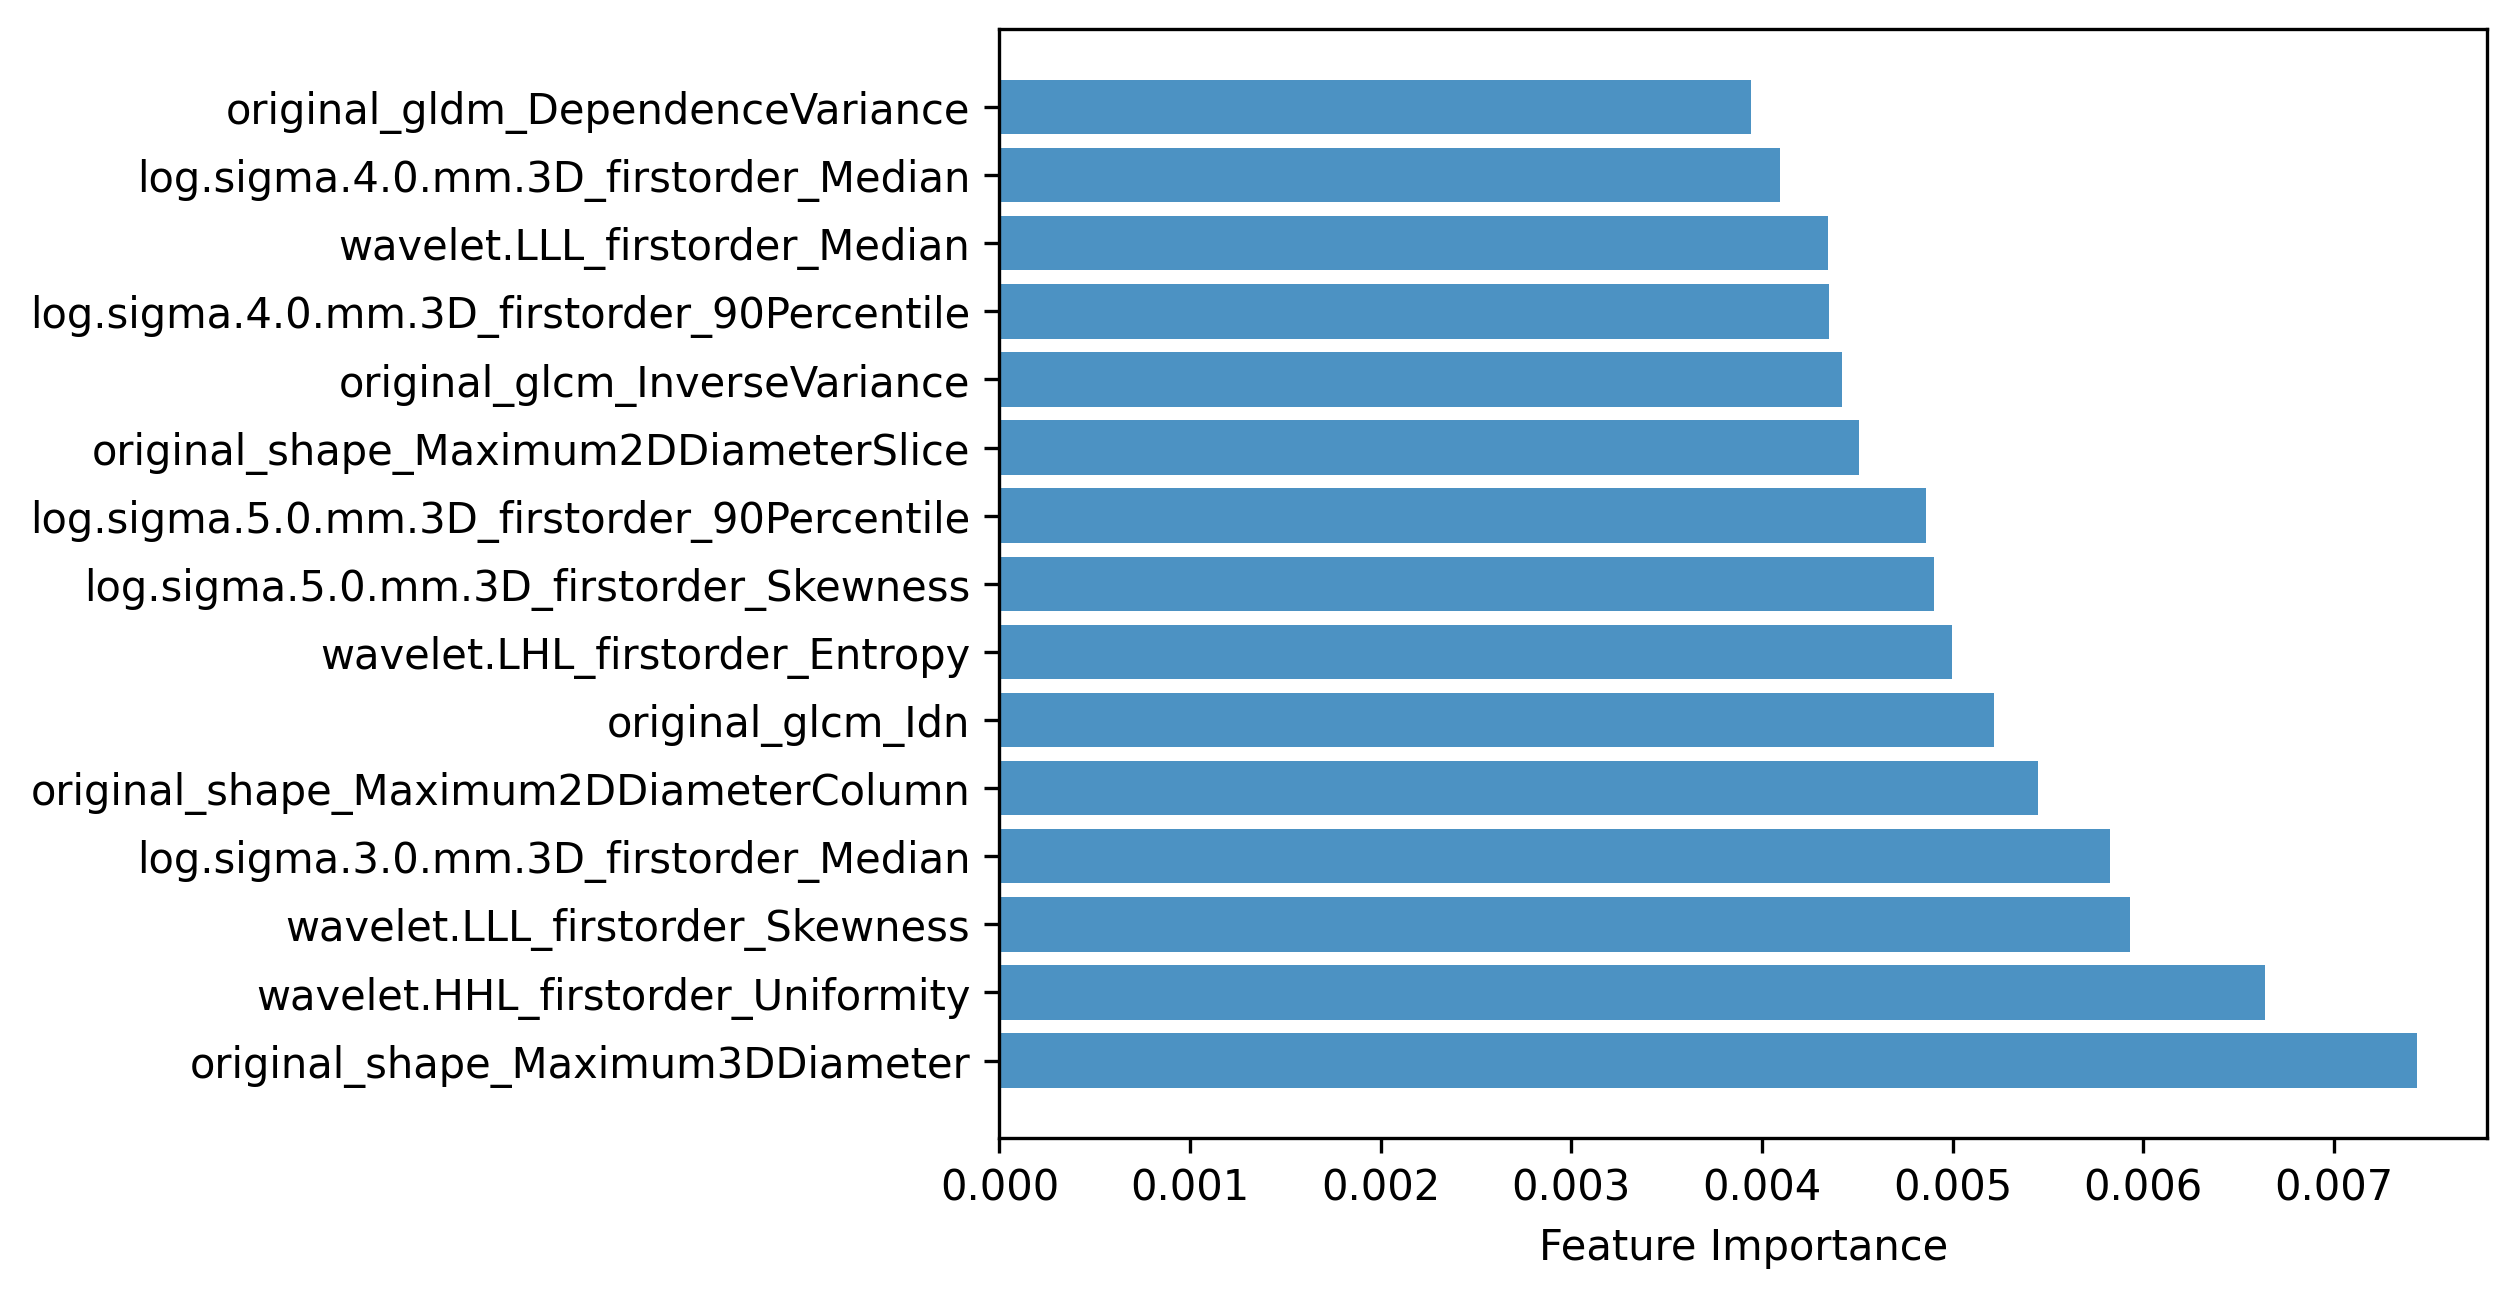

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running Logistic...
The model has been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.864   0.725      0.874   0.785     0.827  564.000
True            0.864   0.725      0.672   0.795     0.728  312.000
accuracy        0.789   0.789      0.789   0.789     0.789    0.789
macro avg       0.864   0.725      0.773   0.790     0.778  876.000
weighted avg    0.864   0.725      0.802   0.789     0.792  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False            0.87    0.70      0.880   0.796     0.836   147.00
True             0.87    0.70      0.651   0.778     0.709    72.00
accuracy         0.79    0.79      0.790   0.790     0.790     0.79
macro avg        0.87    0.70      0.765   0.787     0.772   219.00
weighted avg     0.87    0.70      0.805   0.790     0.794   219.00

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 637, in fit
    self._solve_eigen(
  File "/opt/conda/lib/python3.8/site-packages/sklearn/discri

Running LDA...
The model has been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.865   0.734      0.817   0.862     0.839  564.000
True            0.865   0.734      0.722   0.651     0.685  312.000
accuracy        0.787   0.787      0.787   0.787     0.787    0.787
macro avg       0.865   0.734      0.770   0.756     0.762  876.000
weighted avg    0.865   0.734      0.783   0.787     0.784  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.874   0.713      0.879   0.891     0.885  147.000
True            0.874   0.713      0.771   0.750     0.761   72.000
accuracy        0.845   0.845      0.845   0.845     0.845    0.845
macro avg       0.874   0.713      0.825   0.821     0.823  219.000
weighted avg    0.874   0.713      0.844   0.845     0.844  219.000

Running SVM...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.900   0.825      0.885   0.848     0.866  564.000
True            0.900   0.825      0.744   0.801     0.772  312.000
accuracy        0.831   0.831      0.831   0.831     0.831    0.831
macro avg       0.900   0.825      0.815   0.824     0.819  876.000
weighted avg    0.900   0.825      0.835   0.831     0.832  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.871   0.756      0.902   0.816     0.857  147.000
True            0.871   0.756      0.686   0.819     0.747   72.000
accuracy        0.817   0.817      0.817   0.817     0.817    0.817
macro avg       0.871   0.756      0.794   0.818     0.802  219.000
weighted avg    0.871   0.756      0.831   0.817     0.821  219.000

Running KNN...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           1.000   1.000      0.988   1.000     0.994  564.000
True            1.000   1.000      1.000   0.978     0.989  312.000
accuracy        0.992   0.992      0.992   0.992     0.992    0.992
macro avg       1.000   1.000      0.994   0.989     0.991  876.000
weighted avg    1.000   1.000      0.992   0.992     0.992  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.846   0.643      0.889   0.816     0.851  147.000
True            0.846   0.643      0.679   0.792     0.731   72.000
accuracy        0.808   0.808      0.808   0.808     0.808    0.808
macro avg       0.846   0.643      0.784   0.804     0.791  219.000
weighted avg    0.846   0.643      0.820   0.808     0.812  219.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running GaussianNB...
The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.850   0.712      0.875   0.794     0.833  564.000
True            0.850   0.712      0.681   0.795     0.734  312.000
accuracy        0.795   0.795      0.795   0.795     0.795    0.795
macro avg       0.850   0.712      0.778   0.795     0.783  876.000
weighted avg    0.850   0.712      0.806   0.795     0.797  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.849   0.682      0.891   0.776     0.829  147.000
True            0.849   0.682      0.637   0.806     0.712   72.000
accuracy        0.785   0.785      0.785   0.785     0.785    0.785
macro avg       0.849   0.682      0.764   0.791     0.770  219.000
weighted avg    0.849   0.682      0.807   0.785     0.790  219.000

Running DecisionTree...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.909   0.820      0.873   0.863     0.868  564.000
True            0.909   0.820      0.758   0.772     0.765  312.000
accuracy        0.831   0.831      0.831   0.831     0.831    0.831
macro avg       0.909   0.820      0.815   0.818     0.817  876.000
weighted avg    0.909   0.820      0.832   0.831     0.831  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.802   0.629      0.808   0.803     0.805   147.00
True            0.802   0.629      0.603   0.611     0.607    72.00
accuracy        0.740   0.740      0.740   0.740     0.740     0.74
macro avg       0.802   0.629      0.705   0.707     0.706   219.00
weighted avg    0.802   0.629      0.741   0.740     0.740   219.00

Running ExtraTrees...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           1.000   1.000      0.988   1.000     0.994  564.000
True            1.000   1.000      1.000   0.978     0.989  312.000
accuracy        0.992   0.992      0.992   0.992     0.992    0.992
macro avg       1.000   1.000      0.994   0.989     0.991  876.000
weighted avg    1.000   1.000      0.992   0.992     0.992  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.856   0.670      0.866   0.837     0.851  147.000
True            0.856   0.670      0.688   0.736     0.711   72.000
accuracy        0.804   0.804      0.804   0.804     0.804    0.804
macro avg       0.856   0.670      0.777   0.786     0.781  219.000
weighted avg    0.856   0.670      0.808   0.804     0.805  219.000

Running RandomForest...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.916   0.857      0.878   0.871     0.874  564.000
True            0.916   0.857      0.770   0.782     0.776  312.000
accuracy        0.839   0.839      0.839   0.839     0.839    0.839
macro avg       0.916   0.857      0.824   0.826     0.825  876.000
weighted avg    0.916   0.857      0.840   0.839     0.839  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.859   0.761      0.848   0.837     0.842   147.00
True            0.859   0.761      0.676   0.694     0.685    72.00
accuracy        0.790   0.790      0.790   0.790     0.790     0.79
macro avg       0.859   0.761      0.762   0.766     0.764   219.00
weighted avg    0.859   0.761      0.792   0.790     0.791   219.00

Running Bagging...
The model has not been fit on the training dataset.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.902   0.828      0.858   0.887     0.872  564.000
True            0.902   0.828      0.782   0.734     0.757  312.000
accuracy        0.832   0.832      0.832   0.832     0.832    0.832
macro avg       0.902   0.828      0.820   0.810     0.814  876.000
weighted avg    0.902   0.828      0.831   0.832     0.831  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.875   0.760      0.856   0.850     0.853  147.000
True            0.875   0.760      0.699   0.708     0.703   72.000
accuracy        0.804   0.804      0.804   0.804     0.804    0.804
macro avg       0.875   0.760      0.777   0.779     0.778  219.000
weighted avg    0.875   0.760      0.804   0.804     0.804  219.000

Running AdaBoost...


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py", line 151, in fit
    self._validate_estimator()
  File "/opt/conda/lib/python3.8/site-packages

The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.860   0.728      0.859   0.785     0.820  564.000
True            0.860   0.728      0.664   0.766     0.711  312.000
accuracy        0.779   0.779      0.779   0.779     0.779    0.779
macro avg       0.860   0.728      0.761   0.776     0.766  876.000
weighted avg    0.860   0.728      0.789   0.779     0.782  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.859   0.685      0.873   0.796     0.833  147.000
True            0.859   0.685      0.647   0.764     0.701   72.000
accuracy        0.785   0.785      0.785   0.785     0.785    0.785
macro avg       0.859   0.685      0.760   0.780     0.767  219.000
weighted avg    0.859   0.685      0.799   0.785     0.789  219.000

Running GradientBoost...
The model has not been fit on the training dataset.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.954   0.925      0.914   0.910     0.912  564.000
True            0.954   0.925      0.838   0.846     0.842  312.000
accuracy        0.887   0.887      0.887   0.887     0.887    0.887
macro avg       0.954   0.925      0.876   0.878     0.877  876.000
weighted avg    0.954   0.925      0.887   0.887     0.887  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.856   0.707      0.867   0.844     0.855  147.000
True            0.856   0.707      0.697   0.736     0.716   72.000
accuracy        0.808   0.808      0.808   0.808     0.808    0.808
macro avg       0.856   0.707      0.782   0.790     0.786  219.000
weighted avg    0.856   0.707      0.811   0.808     0.809  219.000

Running MLP...
The model has not been fit on the training dataset.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.878   0.787      0.874   0.835     0.854  564.000
True            0.878   0.787      0.724   0.782     0.752  312.000
accuracy        0.816   0.816      0.816   0.816     0.816    0.816
macro avg       0.878   0.787      0.799   0.809     0.803  876.000
weighted avg    0.878   0.787      0.820   0.816     0.818  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.867   0.733      0.879   0.837     0.857  147.000
True            0.867   0.733      0.696   0.764     0.728   72.000
accuracy        0.813   0.813      0.813   0.813     0.813    0.813
macro avg       0.867   0.733      0.787   0.800     0.793  219.000
weighted avg    0.867   0.733      0.819   0.813     0.815  219.000

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


<Figure size 640x720 with 0 Axes>

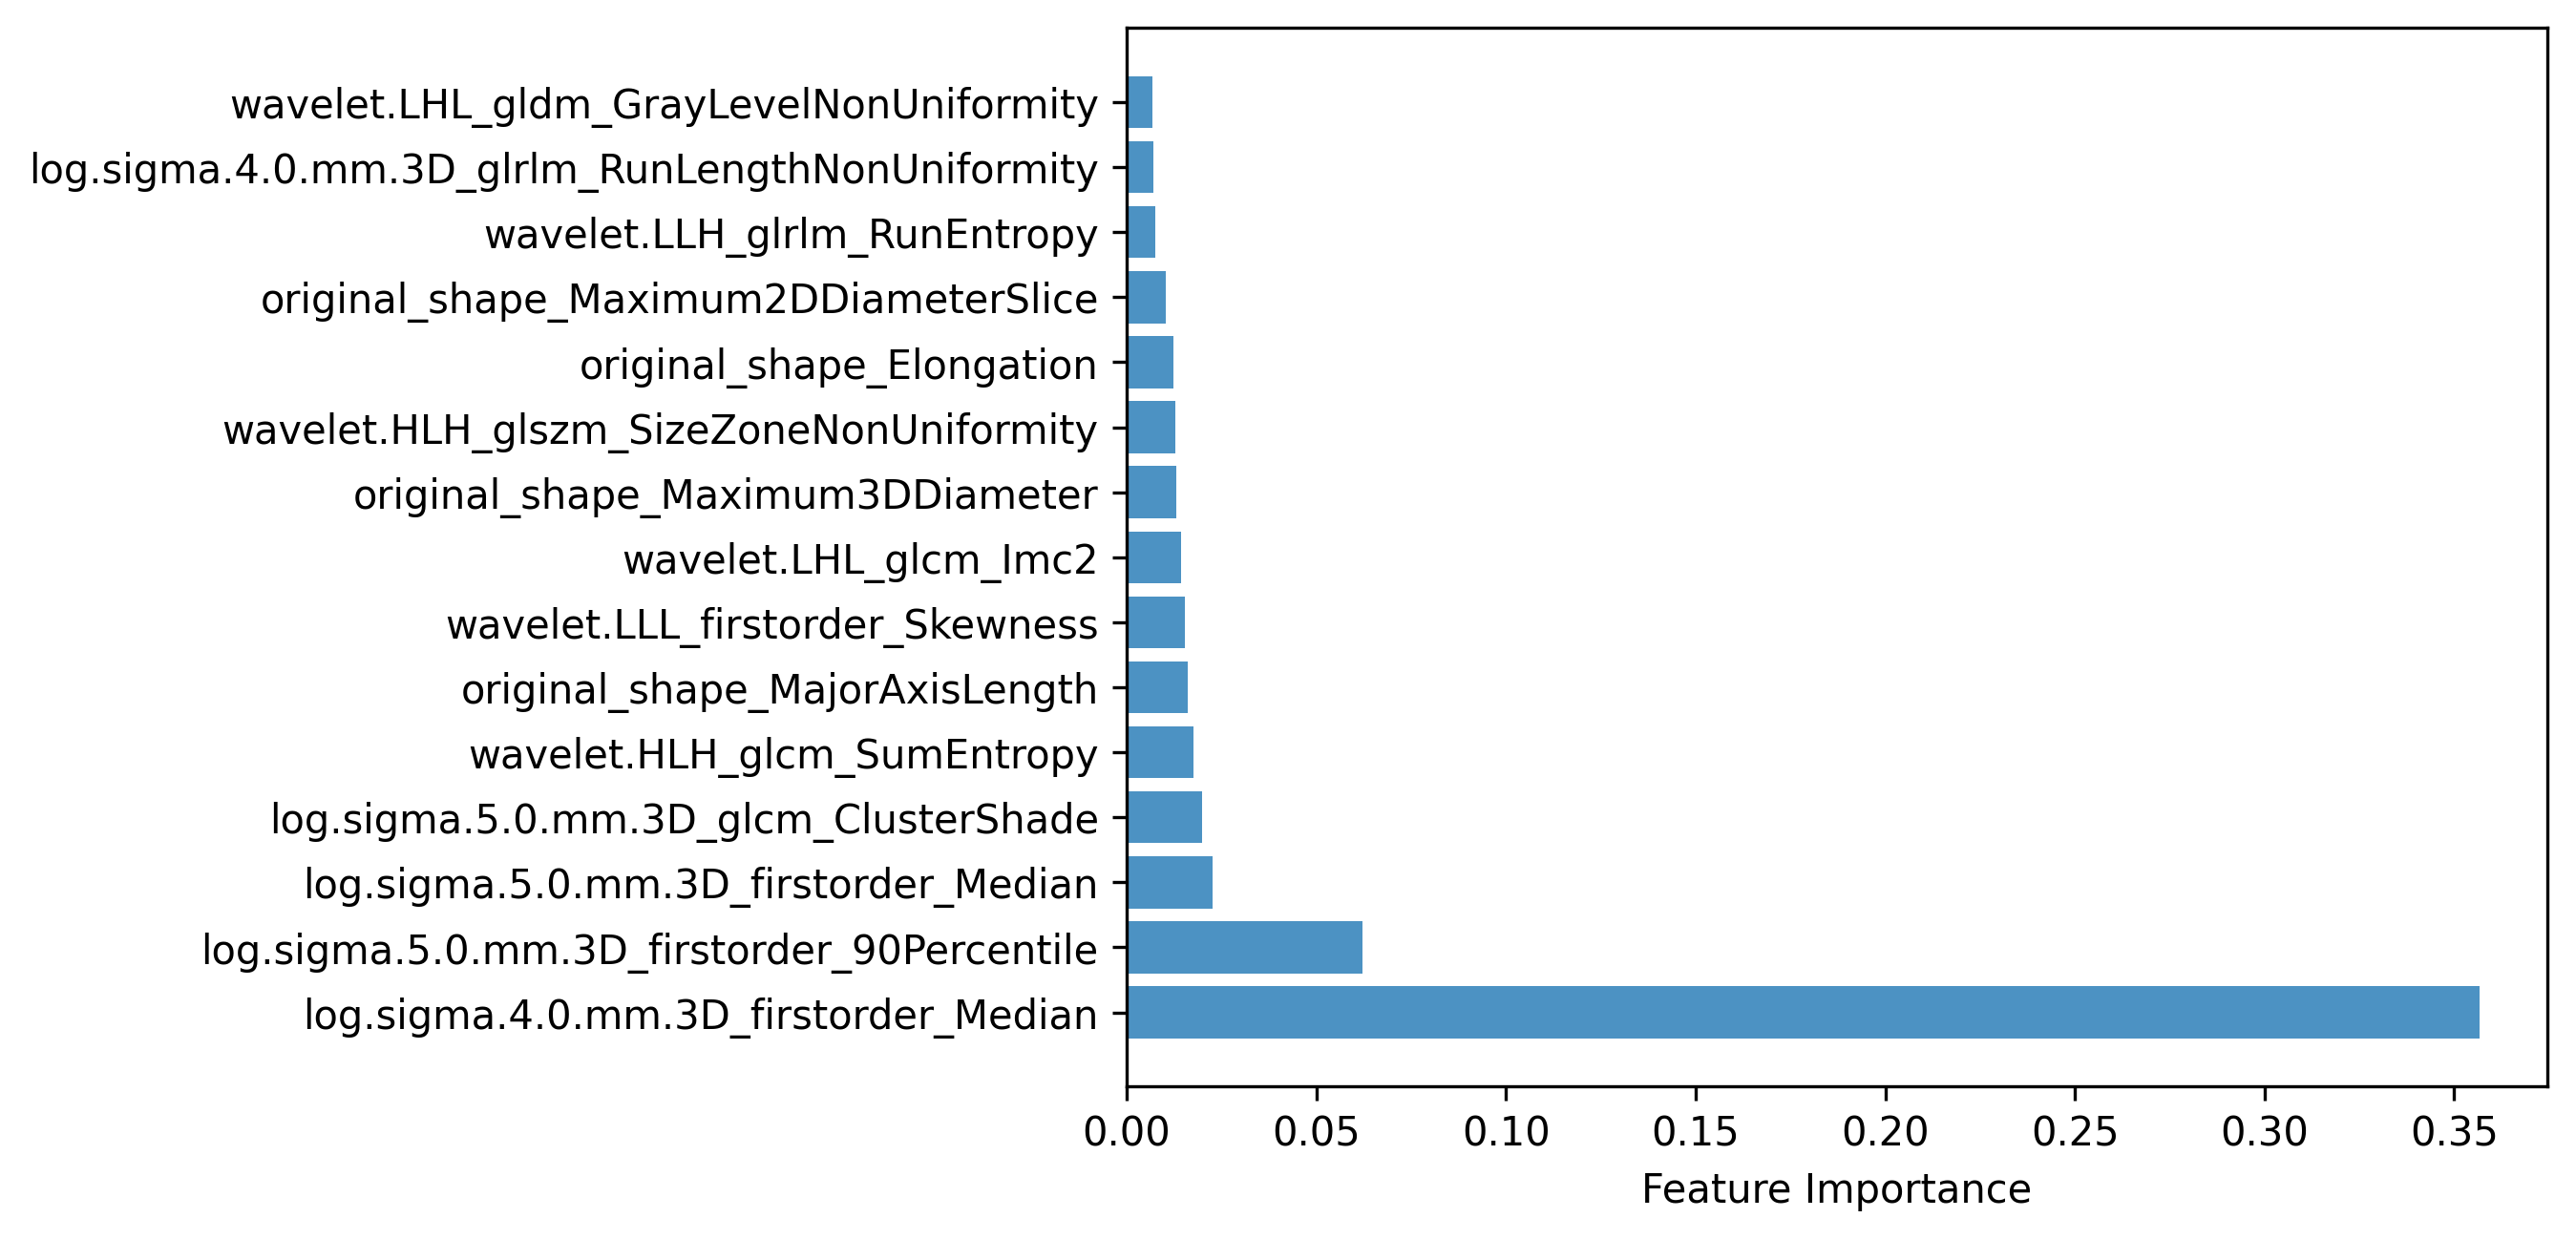

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running Logistic...
The model has been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.864   0.725      0.882   0.796     0.837    564.0
True            0.864   0.725      0.687   0.808     0.742    312.0
accuracy        0.800   0.800      0.800   0.800     0.800      0.8
macro avg       0.864   0.725      0.784   0.802     0.790    876.0
weighted avg    0.864   0.725      0.813   0.800     0.803    876.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.885   0.757      0.897   0.769     0.828  147.000
True            0.885   0.757      0.634   0.819     0.715   72.000
accuracy        0.785   0.785      0.785   0.785     0.785    0.785
macro avg       0.885   0.757      0.766   0.794     0.771  219.000
weighted avg    0.885   0.757      0.811   0.785     0.791  219.000

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
4 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 637, in fit
    self._solve_eigen(
  File "/opt/conda/lib/python3.8/site-packages/sklearn/discri

Running LDA...
The model has been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.863   0.727      0.825   0.863     0.844  564.000
True            0.863   0.727      0.731   0.670     0.699  312.000
accuracy        0.795   0.795      0.795   0.795     0.795    0.795
macro avg       0.863   0.727      0.778   0.767     0.772  876.000
weighted avg    0.863   0.727      0.792   0.795     0.792  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.881   0.738      0.866   0.837     0.851  147.000
True            0.881   0.738      0.688   0.736     0.711   72.000
accuracy        0.804   0.804      0.804   0.804     0.804    0.804
macro avg       0.881   0.738      0.777   0.786     0.781  219.000
weighted avg    0.881   0.738      0.808   0.804     0.805  219.000

Running SVM...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.914   0.852      0.886   0.842     0.864  564.000
True            0.914   0.852      0.738   0.804     0.770  312.000
accuracy        0.829   0.829      0.829   0.829     0.829    0.829
macro avg       0.914   0.852      0.812   0.823     0.817  876.000
weighted avg    0.914   0.852      0.833   0.829     0.830  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.878   0.762      0.903   0.823     0.861  147.000
True            0.878   0.762      0.694   0.819     0.752   72.000
accuracy        0.822   0.822      0.822   0.822     0.822    0.822
macro avg       0.878   0.762      0.799   0.821     0.806  219.000
weighted avg    0.878   0.762      0.834   0.822     0.825  219.000

Running KNN...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           1.000   1.000      0.988   1.000     0.994  564.000
True            1.000   1.000      1.000   0.978     0.989  312.000
accuracy        0.992   0.992      0.992   0.992     0.992    0.992
macro avg       1.000   1.000      0.994   0.989     0.991  876.000
weighted avg    1.000   1.000      0.992   0.992     0.992  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.867   0.709      0.855   0.844     0.849  147.000
True            0.867   0.709      0.689   0.708     0.699   72.000
accuracy        0.799   0.799      0.799   0.799     0.799    0.799
macro avg       0.867   0.709      0.772   0.776     0.774  219.000
weighted avg    0.867   0.709      0.801   0.799     0.800  219.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running GaussianNB...
The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.842   0.674      0.777   0.867     0.820  564.000
True            0.842   0.674      0.696   0.551     0.615  312.000
accuracy        0.755   0.755      0.755   0.755     0.755    0.755
macro avg       0.842   0.674      0.737   0.709     0.718  876.000
weighted avg    0.842   0.674      0.749   0.755     0.747  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.845   0.685      0.842   0.871     0.856  147.000
True            0.845   0.685      0.716   0.667     0.691   72.000
accuracy        0.804   0.804      0.804   0.804     0.804    0.804
macro avg       0.845   0.685      0.779   0.769     0.773  219.000
weighted avg    0.845   0.685      0.801   0.804     0.802  219.000

Running DecisionTree...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.909   0.826      0.912   0.807     0.856  564.000
True            0.909   0.826      0.711   0.859     0.778  312.000
accuracy        0.825   0.825      0.825   0.825     0.825    0.825
macro avg       0.909   0.826      0.811   0.833     0.817  876.000
weighted avg    0.909   0.826      0.840   0.825     0.828  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.839   0.679      0.876   0.769     0.819  147.000
True            0.839   0.679      0.622   0.778     0.691   72.000
accuracy        0.772   0.772      0.772   0.772     0.772    0.772
macro avg       0.839   0.679      0.749   0.773     0.755  219.000
weighted avg    0.839   0.679      0.793   0.772     0.777  219.000

Running ExtraTrees...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           1.000   1.000      0.988   1.000     0.994  564.000
True            1.000   1.000      1.000   0.978     0.989  312.000
accuracy        0.992   0.992      0.992   0.992     0.992    0.992
macro avg       1.000   1.000      0.994   0.989     0.991  876.000
weighted avg    1.000   1.000      0.992   0.992     0.992  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.853   0.691      0.824   0.830     0.827  147.000
True            0.853   0.691      0.648   0.639     0.643   72.000
accuracy        0.767   0.767      0.767   0.767     0.767    0.767
macro avg       0.853   0.691      0.736   0.734     0.735  219.000
weighted avg    0.853   0.691      0.766   0.767     0.767  219.000

Running RandomForest...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.930   0.888      0.883   0.858     0.871  564.000
True            0.930   0.888      0.756   0.795     0.775  312.000
accuracy        0.836   0.836      0.836   0.836     0.836    0.836
macro avg       0.930   0.888      0.820   0.827     0.823  876.000
weighted avg    0.930   0.888      0.838   0.836     0.836  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.883   0.782      0.876   0.816     0.845  147.000
True            0.883   0.782      0.671   0.764     0.714   72.000
accuracy        0.799   0.799      0.799   0.799     0.799    0.799
macro avg       0.883   0.782      0.773   0.790     0.780  219.000
weighted avg    0.883   0.782      0.808   0.799     0.802  219.000

Running Bagging...
The model has not been fit on the training dataset.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.915   0.861      0.863   0.872     0.868  564.000
True            0.915   0.861      0.765   0.750     0.757  312.000
accuracy        0.829   0.829      0.829   0.829     0.829    0.829
macro avg       0.915   0.861      0.814   0.811     0.813  876.000
weighted avg    0.915   0.861      0.828   0.829     0.828  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.890   0.800      0.898   0.837     0.866  147.000
True            0.890   0.800      0.707   0.806     0.753   72.000
accuracy        0.826   0.826      0.826   0.826     0.826    0.826
macro avg       0.890   0.800      0.803   0.821     0.810  219.000
weighted avg    0.890   0.800      0.835   0.826     0.829  219.000

Running AdaBoost...


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py", line 151, in fit
    self._validate_estimator()
  File "/opt/conda/lib/python3.8/site-packages

The model has not been fit on the training dataset.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.925   0.872      0.755   0.980     0.853  564.000
True            0.925   0.872      0.924   0.426     0.583  312.000
accuracy        0.783   0.783      0.783   0.783     0.783    0.783
macro avg       0.925   0.872      0.840   0.703     0.718  876.000
weighted avg    0.925   0.872      0.815   0.783     0.757  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.865   0.755      0.755   0.946     0.840  147.000
True            0.865   0.755      0.771   0.375     0.505   72.000
accuracy        0.758   0.758      0.758   0.758     0.758    0.758
macro avg       0.865   0.755      0.763   0.660     0.672  219.000
weighted avg    0.865   0.755      0.761   0.758     0.730  219.000

Running GradientBoost...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The model has not been fit on the training dataset.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.919   0.859      0.886   0.858     0.872  564.000
True            0.919   0.859      0.758   0.801     0.779  312.000
accuracy        0.838   0.838      0.838   0.838     0.838    0.838
macro avg       0.919   0.859      0.822   0.830     0.825  876.000
weighted avg    0.919   0.859      0.841   0.838     0.839  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.883   0.778      0.885   0.837     0.860  147.000
True            0.883   0.778      0.700   0.778     0.737   72.000
accuracy        0.817   0.817      0.817   0.817     0.817    0.817
macro avg       0.883   0.778      0.792   0.807     0.798  219.000
weighted avg    0.883   0.778      0.824   0.817     0.820  219.000

Running MLP...
The model has not been fit on the training dataset.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.916   0.870      0.897   0.853     0.875  564.000
True            0.916   0.870      0.756   0.824     0.788  312.000
accuracy        0.842   0.842      0.842   0.842     0.842    0.842
macro avg       0.916   0.870      0.827   0.838     0.831  876.000
weighted avg    0.916   0.870      0.847   0.842     0.844  876.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC-AUC  PR-AUC  precision  recall  f1-score  support
False           0.878   0.759      0.887   0.803     0.843  147.000
True            0.878   0.759      0.663   0.792     0.722   72.000
accuracy        0.799   0.799      0.799   0.799     0.799    0.799
macro avg       0.878   0.759      0.775   0.797     0.782  219.000
weighted avg    0.878   0.759      0.813   0.799     0.803  219.000

In [4]:
all_result_dict = dict()
for k,method in enumerate(feature_select_methods):
    dir_result_method = os.path.join(dir_result,method)
    if not os.path.isdir(dir_result_method):
        os.mkdir(dir_result_method)

    result_dict = run_algorithms(
        data_internal,
        data_external=None,
        clf_names=clf_names,
        feature_select_method=method,
        kbest=15,
        dir_result=dir_result_method)
    all_result_dict[method] = result_dict

# 绘图

In [12]:
# SearchCV超参数寻优期间，最佳模型在验证集的roc_auc
cv_roc_auc = [
    [all_result_dict[method][clf_name]['search'].best_score_  for clf_name in clf_names] \
    for method in feature_select_methods]

df_cv_roc_aucs = pd.DataFrame(data=cv_roc_auc,columns=clf_names, index=feature_select_methods)
display(df_cv_roc_aucs)


train_pr_aucs = [
    [all_result_dict[method][clf_name]['train']['pr_auc'] for clf_name in clf_names] \
    for method in feature_select_methods]

df_train_pr_aucs = pd.DataFrame(data=train_pr_aucs,columns=clf_names, index=feature_select_methods)


test_pr_aucs = [
    [all_result_dict[method][clf_name]['test']['pr_auc'] for clf_name in clf_names] \
    for method in feature_select_methods]

df_test_pr_aucs = pd.DataFrame(data=test_pr_aucs,columns=clf_names, index=feature_select_methods)

# display(df_train_pr_aucs)
# display(df_test_pr_aucs)

train_roc_aucs = [
    [all_result_dict[method][clf_name]['train']['roc_auc'] for clf_name in clf_names] \
    for method in feature_select_methods]

df_train_roc_aucs = pd.DataFrame(data=train_roc_aucs,columns=clf_names, index=feature_select_methods)


test_roc_aucs = [
    [all_result_dict[method][clf_name]['test']['roc_auc'] for clf_name in clf_names] \
    for method in feature_select_methods]

df_test_roc_aucs = pd.DataFrame(data=test_roc_aucs,columns=clf_names, index=feature_select_methods)

# display(df_train_roc_aucs)
# display(df_test_roc_aucs)

Logistic       LDA       SVM       KNN  GaussianNB  \
MIC            0.835017  0.834805  0.837072  0.835303    0.835303   
RFE            0.888543  0.885700  0.885220  0.840223    0.840223   
EmbeddingLSVC  0.885851  0.885600  0.874810  0.857345    0.857345   
EmbeddingLR    0.834404  0.834950  0.861118  0.834945    0.834945   
EmbeddingTree  0.853785  0.853167  0.849654  0.845913    0.845913   
EmbeddingRF    0.854707  0.854162  0.859346  0.842851    0.842851   

               DecisionTree  ExtraTrees  RandomForest   Bagging  AdaBoost  \
MIC                0.797288    0.840182      0.841186  0.840642  0.840286   
RFE                0.794976    0.840831      0.860178  0.889086  0.880915   
EmbeddingLSVC      0.816637    0.855216      0.868612  0.887271  0.887107   
EmbeddingLR        0.799854    0.833045      0.847715  0.861921  0.848393   
EmbeddingTree      0.818093    0.847027      0.862962  0.854463  0.853827   
EmbeddingRF        0.813434    0.855044      0.859503  0.859880  0.854137   

               GradientBoost       MLP  
MIC                 0.841132  0.835665  
RFE                 0.861660  0.870563  
EmbeddingLSVC       0.862976  0.883825  
EmbeddingLR         0.853500  0.842260  
EmbeddingTree       0.860478  0.862130  
EmbeddingRF         0.855185  0.852264

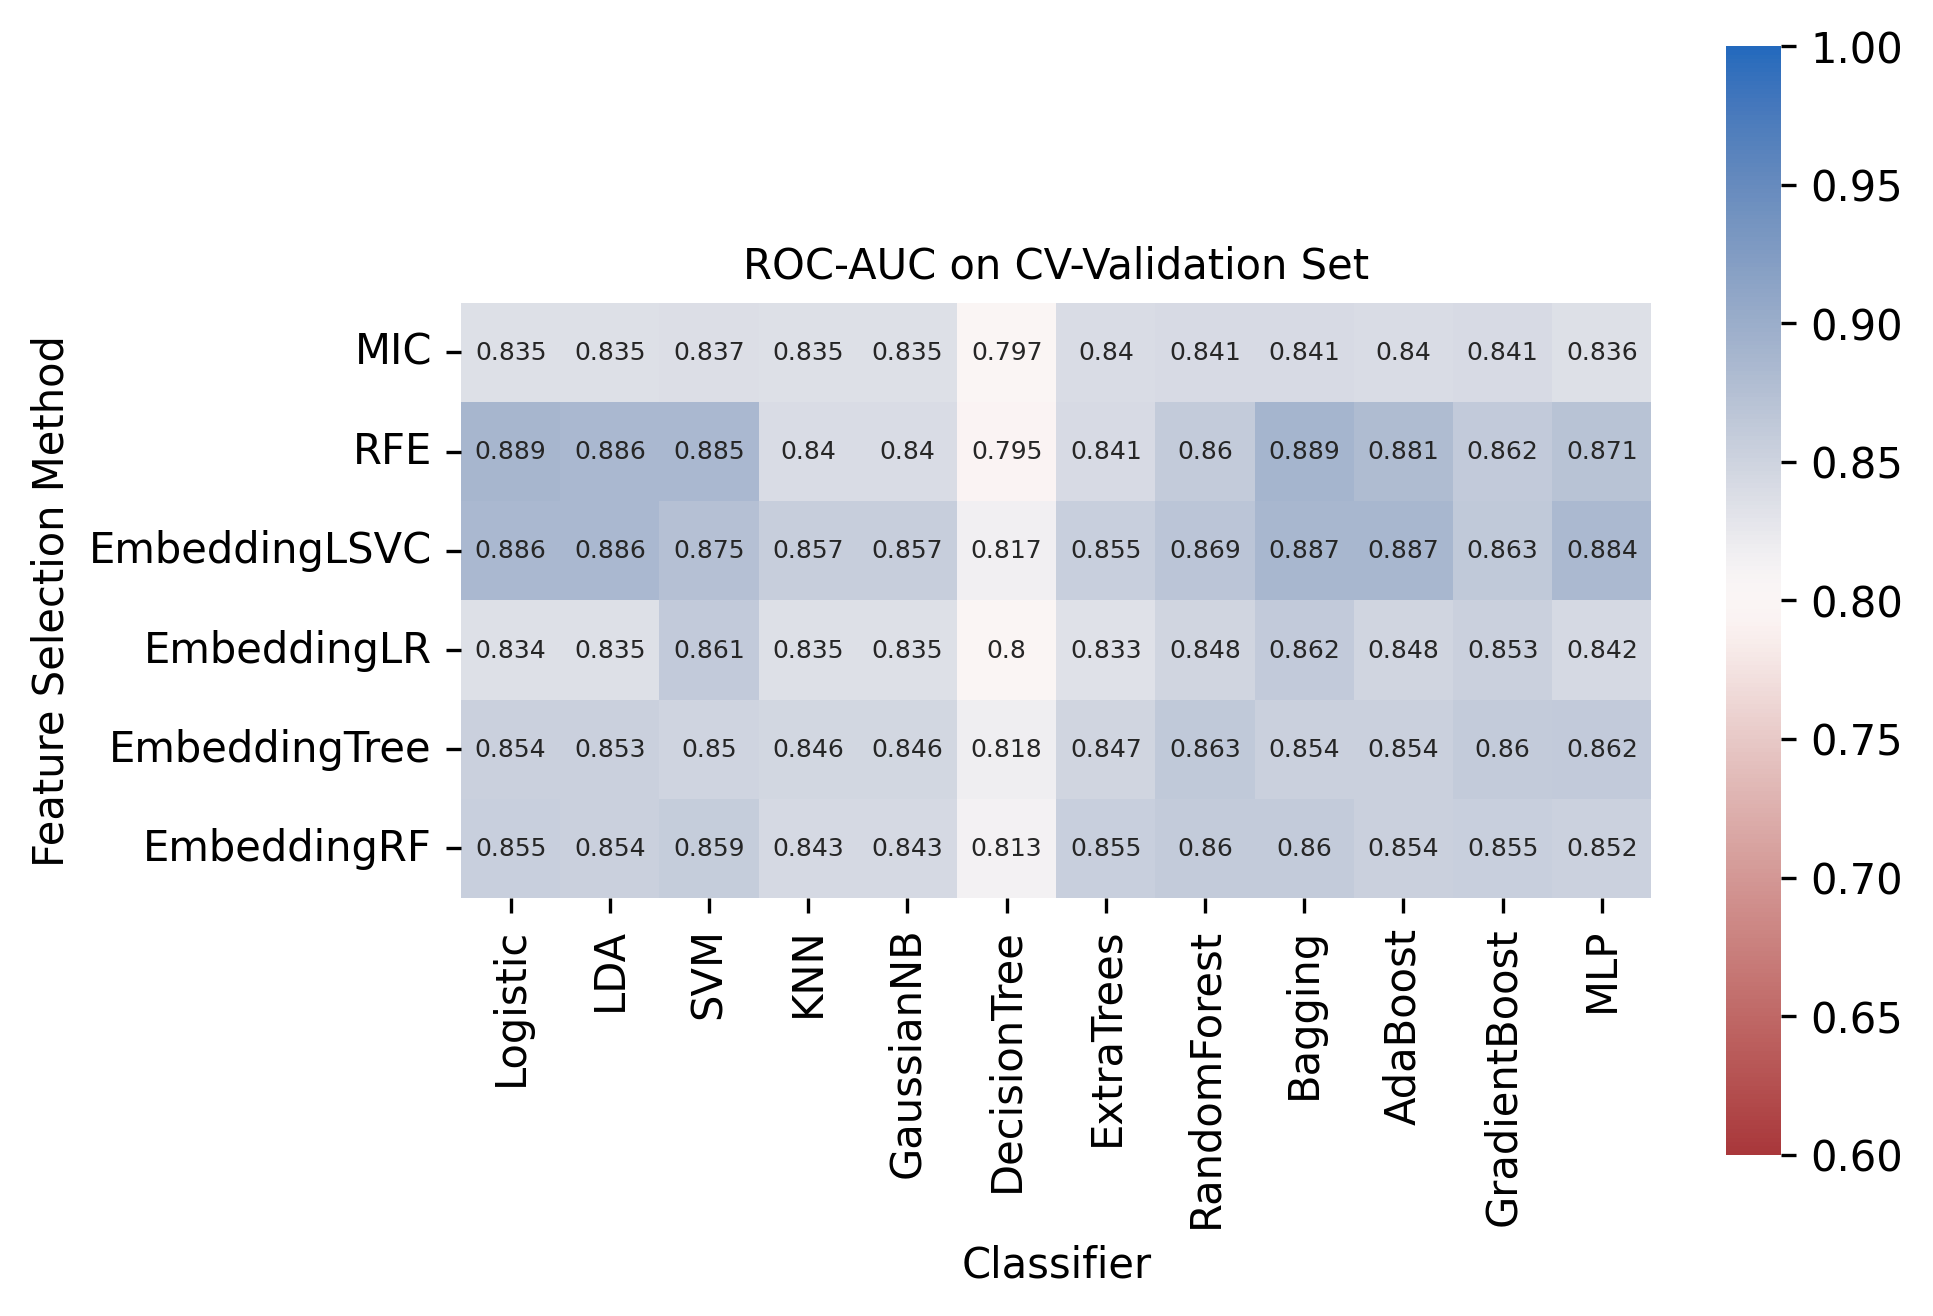

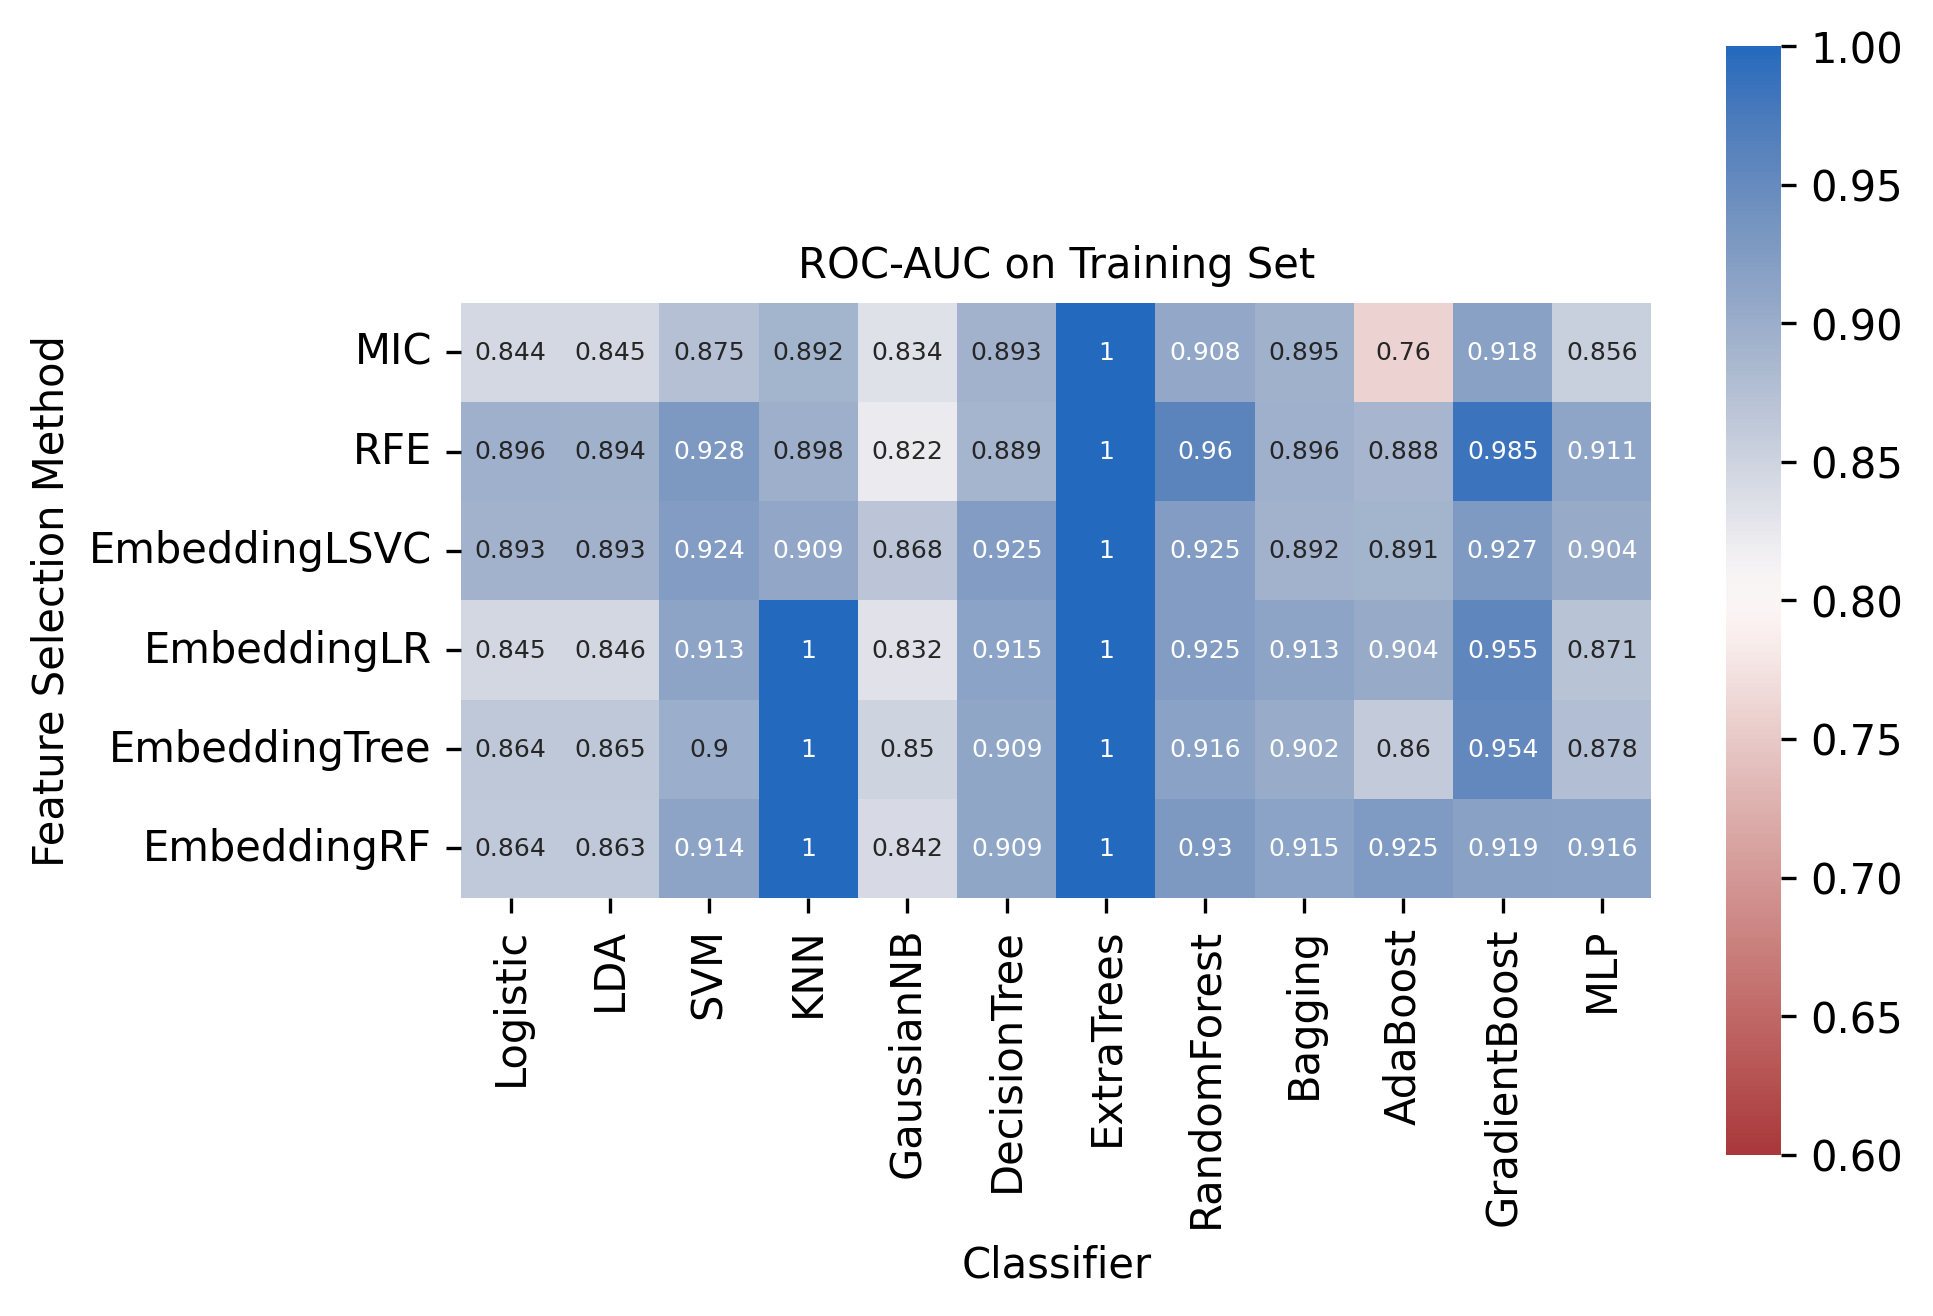

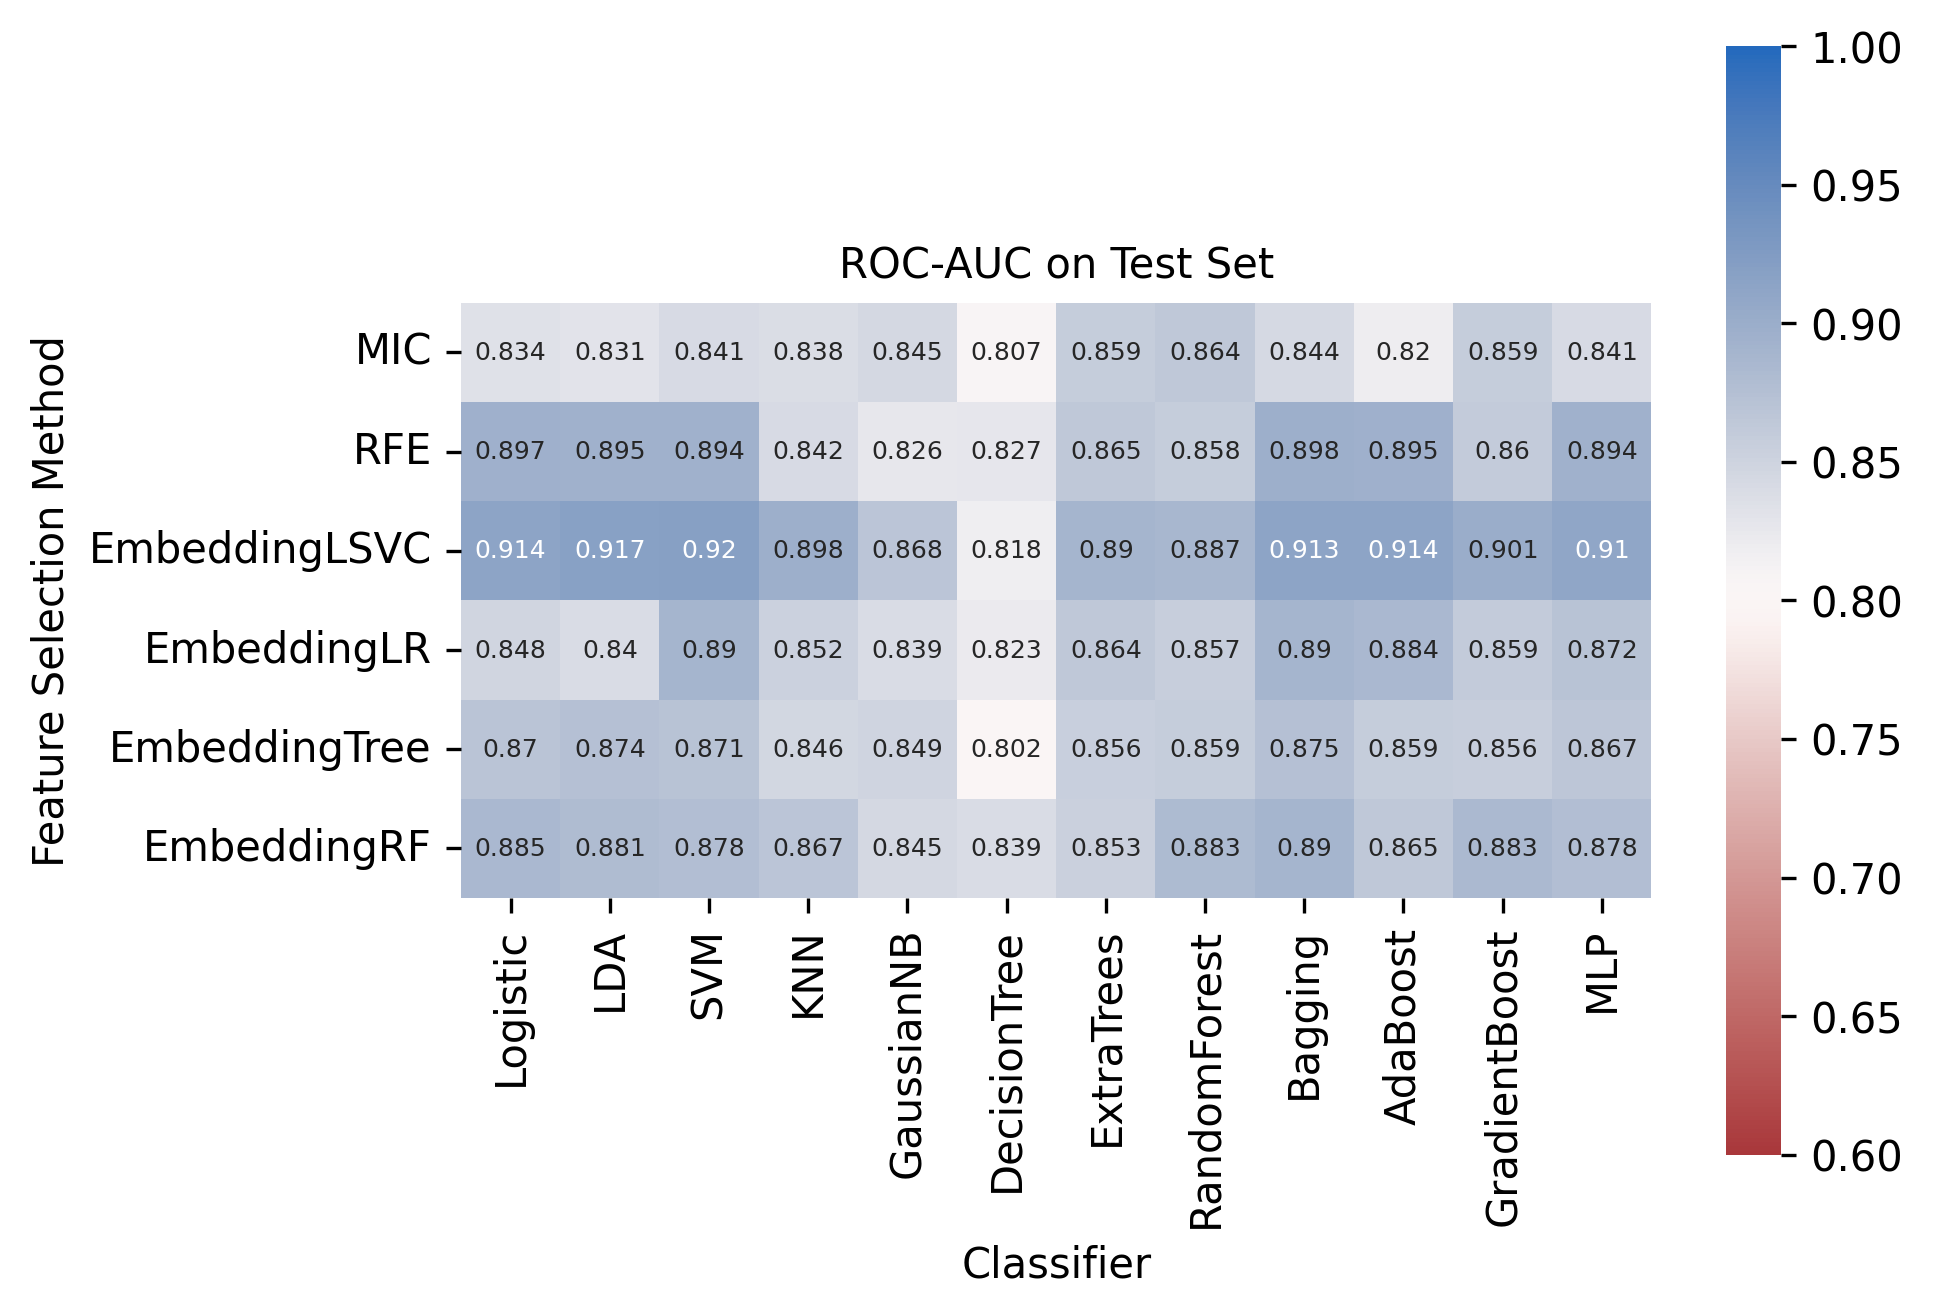

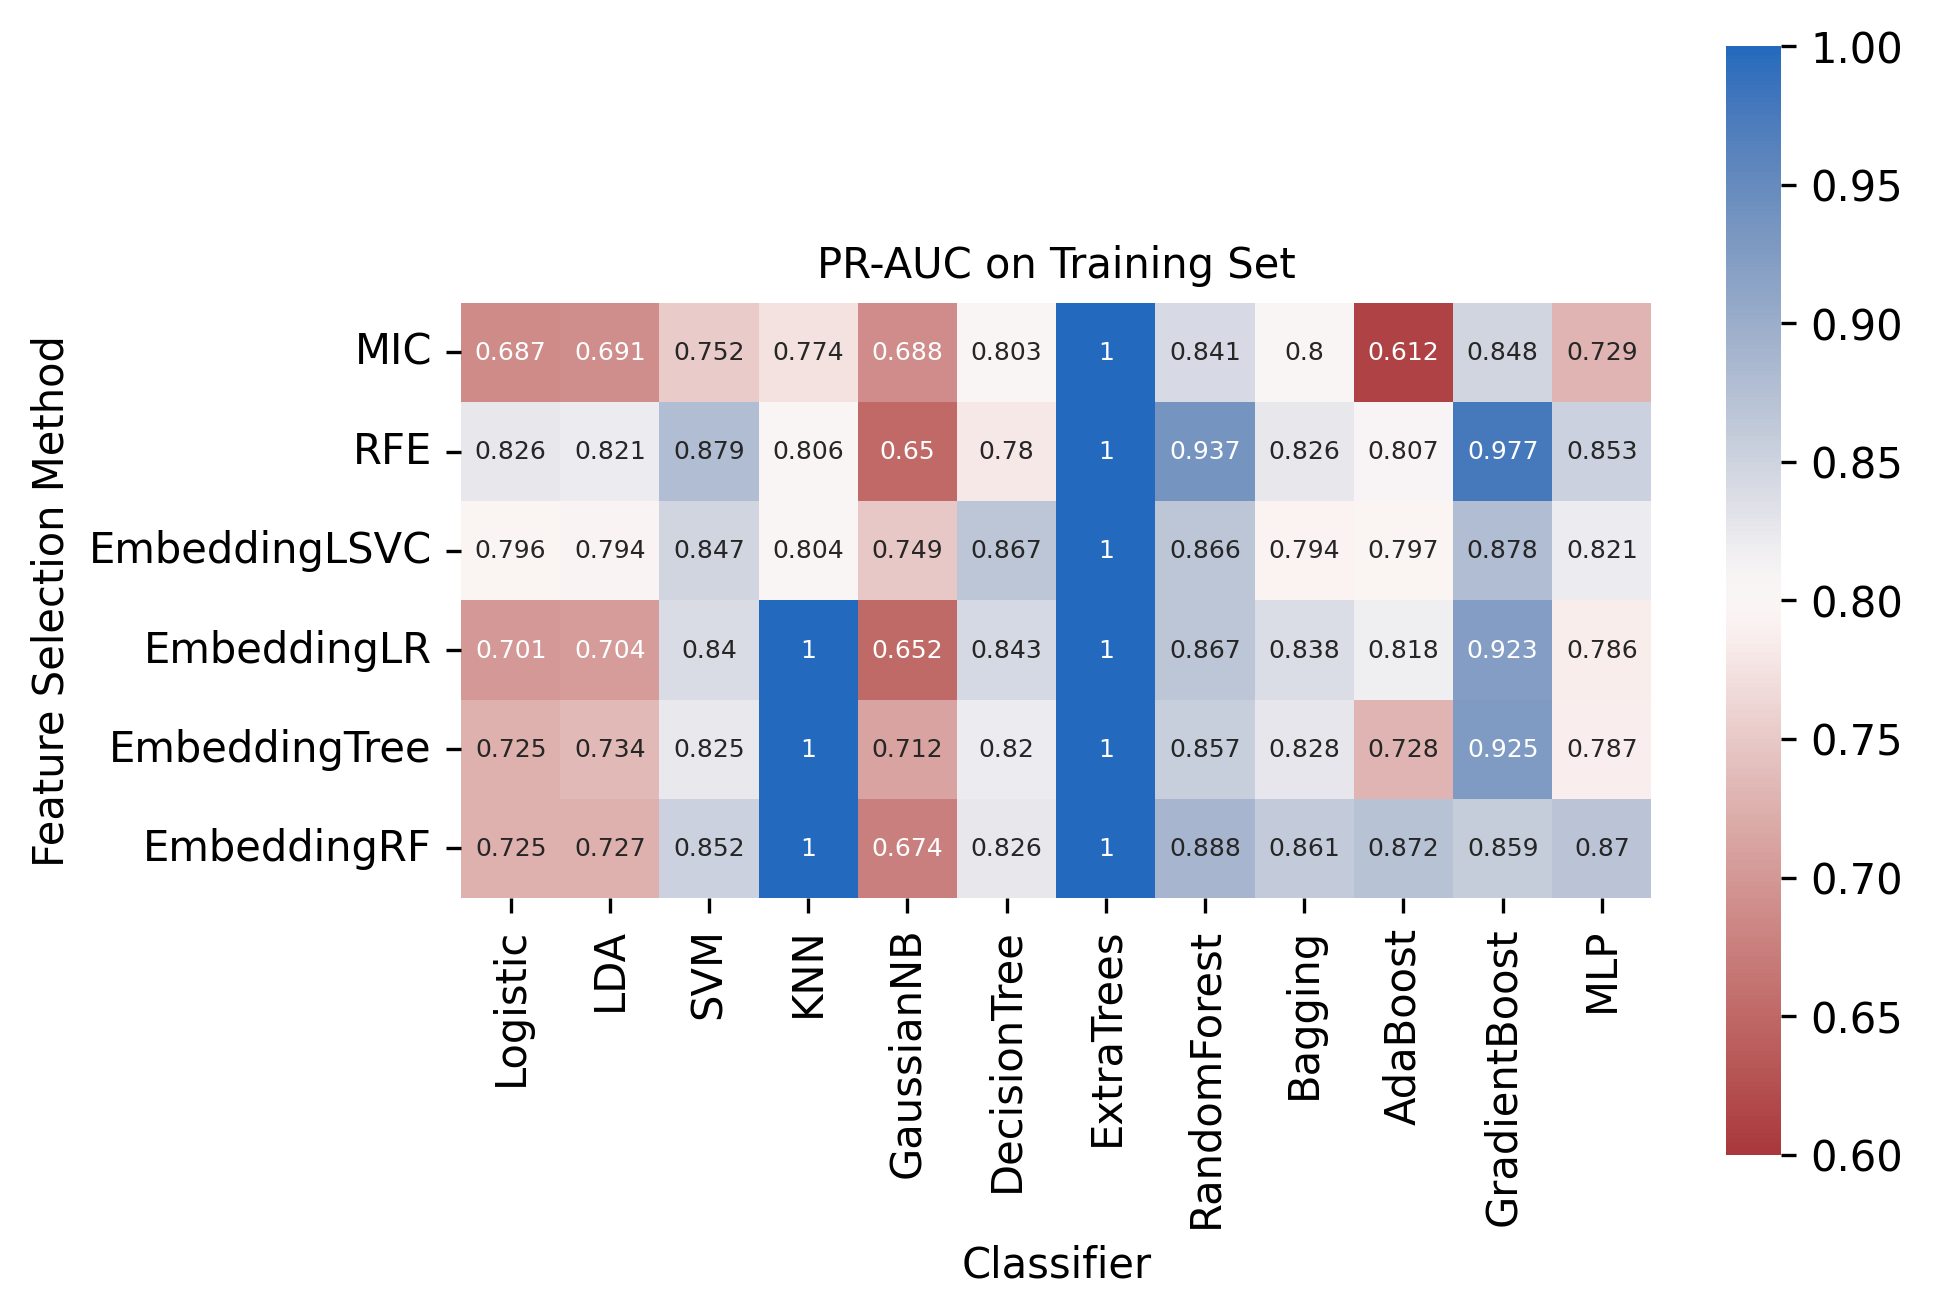

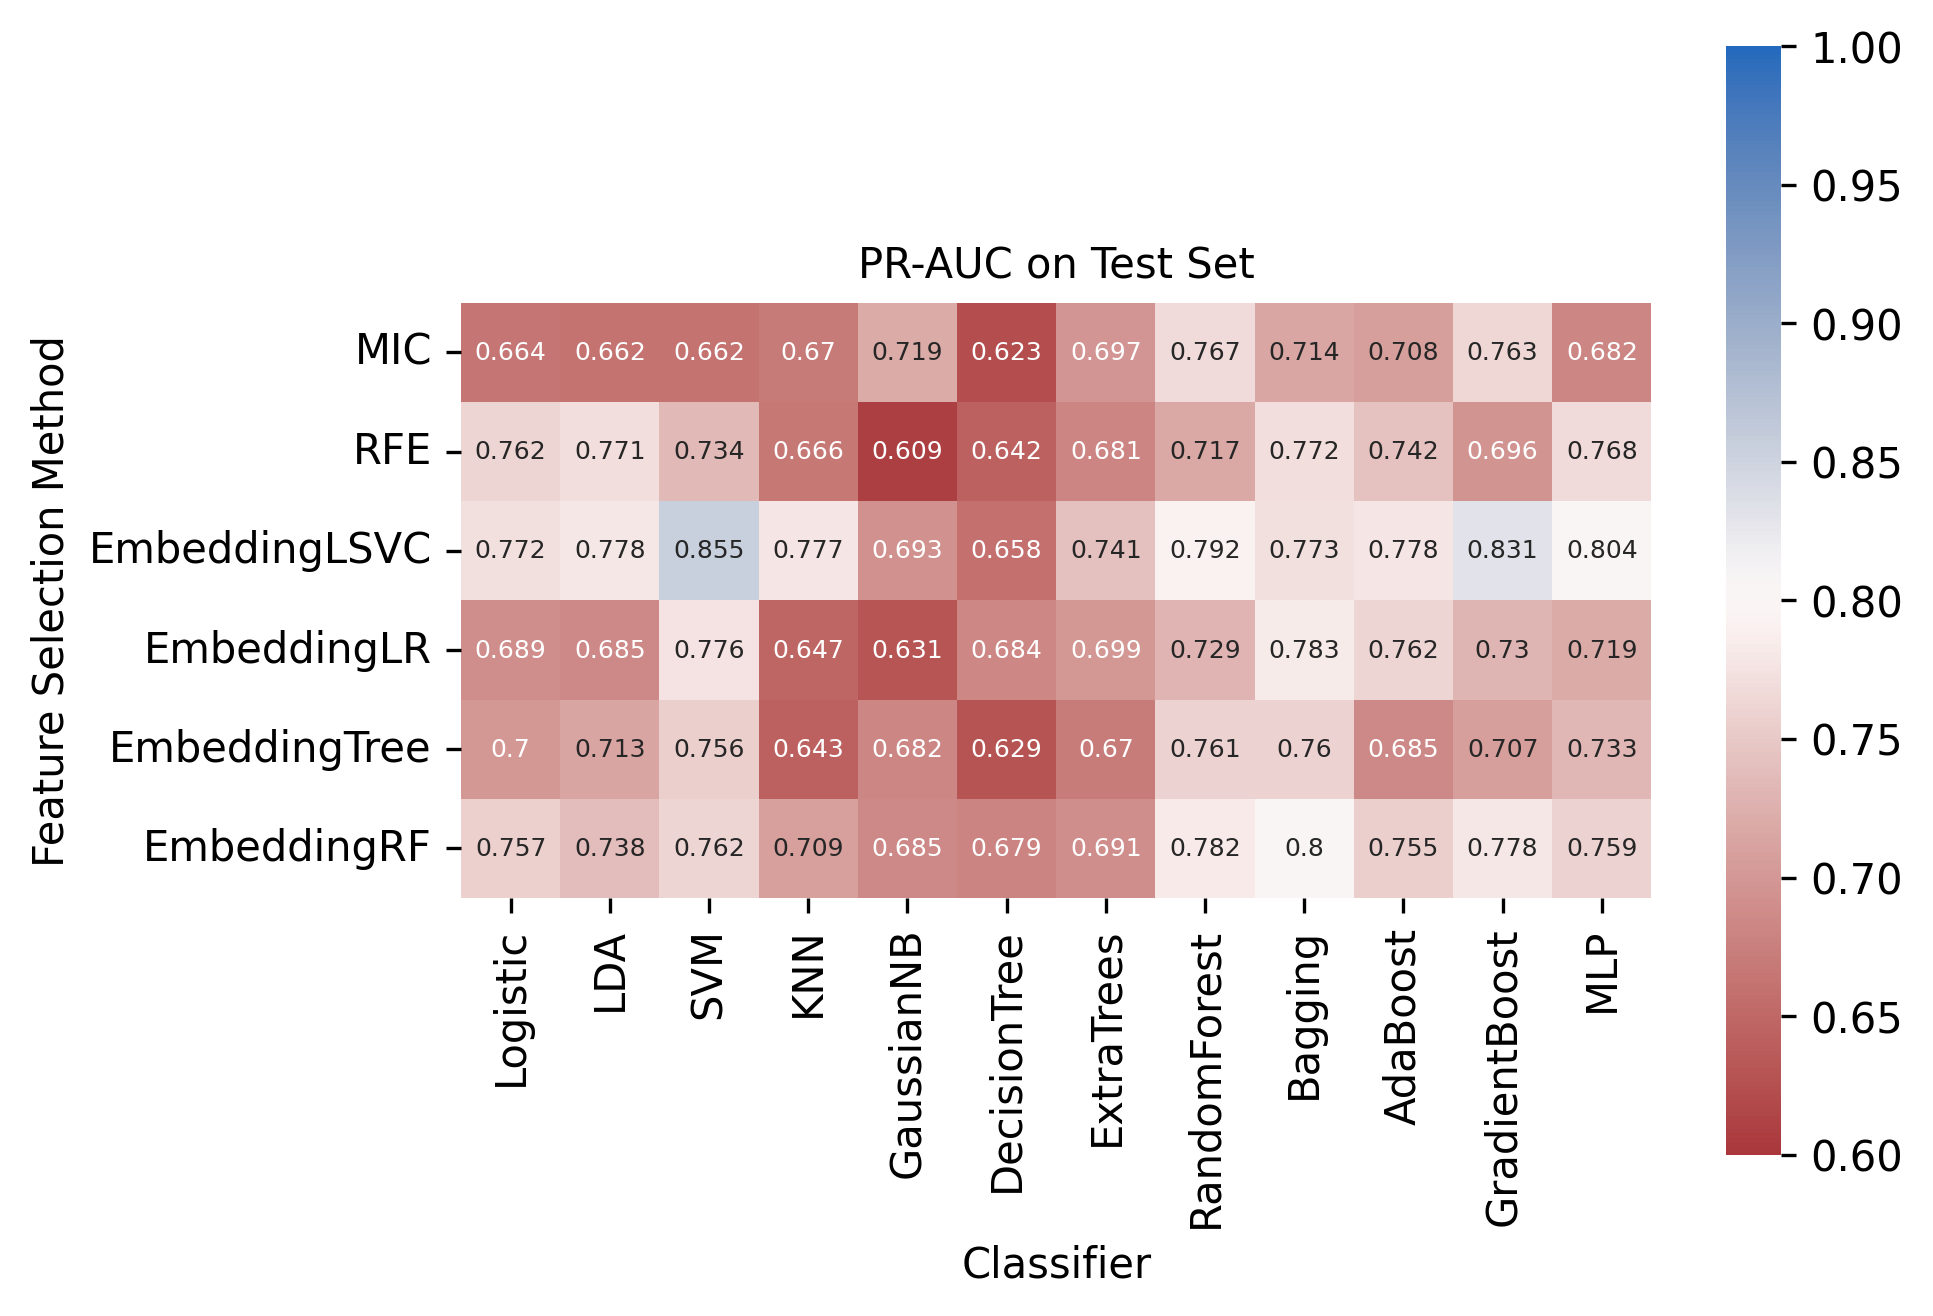

(<Figure size 1920x1440 with 2 Axes>,
 <Axes: title={'center': 'PR-AUC on Test Set'}, xlabel='Classifier', ylabel='Feature Selection Method'>)

In [13]:
# 画图
def plot_matirx(df, title:str=None, fn:str=None, show=True, **kwargs):
    """画矩阵：横轴是机器学习分类算法，纵轴是特征选择算法，格子内的数值是mean_auc"""

    algorithms = df.columns.tolist()
    feature_selection_methods = df.index.tolist()
    
    f,ax = plt.subplots(dpi=300)
    palette = "vlag_r"
    vmin = 0.6
    vmax = 1.0
    yticklabels = list(df.index)
    xticklabels = list(df.columns)
    
    fmt = kwargs.get('fmt',':.3f')
    center = kwargs.get('center', 0.8) 
    annot_kws = kwargs.get('annot_kws',{'size':6,'ha':'center','va':'center'})
    ax = sns.heatmap(df, cmap=palette, square=True, 
                     yticklabels=yticklabels, 
                     xticklabels=xticklabels, 
                     vmin=vmin, vmax=vmax,
                     annot=True,
                     fmt=fmt,
                     center=center,
                     annot_kws=annot_kws,
                    )

    ax.set_title(title,fontsize=10)#图片标题文本和字体大小
    ax.set_xlabel('Classifier',fontsize=10)#x轴label的文本和字体大小
    ax.set_ylabel('Feature Selection Method',fontsize=10)#y轴label的文本和字体大小
    ax.set_xticklabels(algorithms,fontsize=10, rotation='vertical')#x轴刻度的文本和字体大小
    ax.set_yticklabels(feature_selection_methods,fontsize=10, rotation='horizontal')#y轴刻度的文本和字体大小
    #设置colorbar的刻度字体大小
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=10)
    
    if fn is not None:
        plt.savefig(fn, bbox_inches='tight')
    if show:
        plt.show()
    else:
        plt.close()
    return f,ax

# SearchCV超参数寻优期间，最佳模型在验证集的roc_auc
plot_matirx(df_cv_roc_aucs, fmt='.3g',
            title='ROC-AUC on CV-Validation Set',
            fn=os.path.join(dir_result,'ROC-AUC on CV-Validation Set.png'))

#　训练集ROC-AUC矩阵
plot_matirx(df_train_roc_aucs, fmt='.3g',
            title='ROC-AUC on Training Set',
            fn=os.path.join(dir_result,'ROC-AUC on Training Set.png'))
#　测试集ROC-AUC矩阵
plot_matirx(df_test_roc_aucs, fmt='.3g',
            title='ROC-AUC on Test Set',
            fn=os.path.join(dir_result,'ROC-AUC on Test Set.png'))


#　训练集PR-AUC矩阵
plot_matirx(df_train_pr_aucs, fmt='.3g',
            title='PR-AUC on Training Set',
            fn=os.path.join(dir_result,'PR-AUC on Training Set.png'))
#　测试集PR-AUC矩阵
plot_matirx(df_test_pr_aucs, fmt='.3g',
            title='PR-AUC on Test Set',
            fn=os.path.join(dir_result,'PR-AUC on Test Set.png'))

# 差异显著性分析

## topk分类器之间ROC的Delong检验

In [68]:
def get_topk_elms(df,top_k:int):
    # 使用 unstack() 将 DataFrame 转换为 Series，并对值进行排序
    sorted_values = df.T.unstack(level=1).sort_values(ascending=False)
    # 获取最大的 k 个元素
    top_k_elements = sorted_values[:top_k]
    # 找到这些元素所在的位置
    locations = list(top_k_elements.index)
    return locations

top_k = 10
locations = get_topk_elms(df_test_roc_aucs,top_k)
top_k_y_score_dict = dict()
for feature_select_method, clf_name in locations:
    selected_features = all_result_dict[feature_select_method]['selected_features']
    clf = all_result_dict[feature_select_method][clf_name]['classifier']
    # 获取模型在测试集的预测概率值
    top_k_y_score_dict[f'{feature_select_method}-{clf_name}'] = clf.predict_proba(X_test[selected_features].values)[:,1]
    
from delong import *
y_true = y_test.values.squeeze()
df_topk_delong_pval = pd.DataFrame(index=top_k_y_score_dict.keys(), columns=top_k_y_score_dict.keys())
for clf_name1 in top_k_y_score_dict.keys():
    y_pred1 = top_k_y_score_dict[clf_name1]
    for clf_name2 in top_k_y_score_dict.keys():
        y_pred2 = top_k_y_score_dict[clf_name2]
        df_topk_delong_pval.loc[clf_name1, clf_name2] = delong_roc_test(y_true,y_pred1,y_pred2)[0][0]

df_topk_delong_pval.to_excel( os.path.join(dir_result, f"测试集上ROC-AUC top-{top_k}模型的ROC曲线Delong检验p value.xlsx") )
display(df_topk_delong_pval)

EmbeddingLSVC-SVM EmbeddingLSVC-LDA  \
EmbeddingLSVC-SVM                         1.0          0.820367   
EmbeddingLSVC-LDA                    0.820367               1.0   
EmbeddingLSVC-AdaBoost               0.631804          0.316195   
EmbeddingLSVC-Logistic               0.602377          0.267936   
EmbeddingLSVC-Bagging                0.665105          0.520868   
EmbeddingLSVC-MLP                    0.327694          0.176623   
EmbeddingLSVC-GradientBoost          0.139094          0.229577   
RFE-Bagging                          0.139725          0.141409   
EmbeddingLSVC-KNN                    0.058557          0.157656   
RFE-Logistic                         0.139921          0.141259   

                            EmbeddingLSVC-AdaBoost EmbeddingLSVC-Logistic  \
EmbeddingLSVC-SVM                         0.631804               0.602377   
EmbeddingLSVC-LDA                         0.316195               0.267936   
EmbeddingLSVC-AdaBoost                         1.0               0.899832   
EmbeddingLSVC-Logistic                    0.899832                    1.0   
EmbeddingLSVC-Bagging                     0.866604               0.698322   
EmbeddingLSVC-MLP                         0.451911               0.504499   
EmbeddingLSVC-GradientBoost               0.332083               0.364869   
RFE-Bagging                               0.220534               0.211673   
EmbeddingLSVC-KNN                         0.235106               0.253772   
RFE-Logistic                              0.221446               0.212609   

                            EmbeddingLSVC-Bagging EmbeddingLSVC-MLP  \
EmbeddingLSVC-SVM                        0.665105          0.327694   
EmbeddingLSVC-LDA                        0.520868          0.176623   
EmbeddingLSVC-AdaBoost                   0.866604          0.451911   
EmbeddingLSVC-Logistic                   0.698322          0.504499   
EmbeddingLSVC-Bagging                         1.0          0.439091   
EmbeddingLSVC-MLP                        0.439091               1.0   
EmbeddingLSVC-GradientBoost              0.339132          0.509549   
RFE-Bagging                              0.203889          0.370086   
EmbeddingLSVC-KNN                        0.221315          0.350849   
RFE-Logistic                             0.204611          0.371164   

                            EmbeddingLSVC-GradientBoost RFE-Bagging  \
EmbeddingLSVC-SVM                              0.139094    0.139725   
EmbeddingLSVC-LDA                              0.229577    0.141409   
EmbeddingLSVC-AdaBoost                         0.332083    0.220534   
EmbeddingLSVC-Logistic                         0.364869    0.211673   
EmbeddingLSVC-Bagging                          0.339132    0.203889   
EmbeddingLSVC-MLP                              0.509549    0.370086   
EmbeddingLSVC-GradientBoost                         1.0    0.820688   
RFE-Bagging                                    0.820688         1.0   
EmbeddingLSVC-KNN                              0.863173    0.944689   
RFE-Logistic                                   0.820493         1.0   

                            EmbeddingLSVC-KNN RFE-Logistic  
EmbeddingLSVC-SVM                    0.058557     0.139921  
EmbeddingLSVC-LDA                    0.157656     0.141259  
EmbeddingLSVC-AdaBoost               0.235106     0.221446  
EmbeddingLSVC-Logistic               0.253772     0.212609  
EmbeddingLSVC-Bagging                0.221315     0.204611  
EmbeddingLSVC-MLP                    0.350849     0.371164  
EmbeddingLSVC-GradientBoost          0.863173     0.820493  
RFE-Bagging                          0.944689          1.0  
EmbeddingLSVC-KNN                         1.0     0.944548  
RFE-Logistic                         0.944548          1.0

## topk分类器之间PRC(precision-recall curve)的差异检验

### ROC-AUC tok分类器的PRC差异检验

In [69]:
from sklearn.metrics import precision_recall_curve
from scipy.interpolate import interp1d, CubicSpline


top_k = 10
locations = get_topk_elms(df_test_roc_aucs,top_k)


new_thresholds = np.linspace(0.01,0.99,100)
y_true = y_test.values.squeeze()
top_k_PRC_dict = dict()
for feature_select_method, clf_name in locations:
    selected_features = all_result_dict[feature_select_method]['selected_features']
    clf = all_result_dict[feature_select_method][clf_name]['classifier']
    y_score = clf.predict_proba(X_test[selected_features].values)[:,1]
    # 获取模型在测试集的PRC坐标
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    assert len(precision)==len(recall)==len(thresholds)+1, f'len(precision)={len(precision)}, len(recall)={len(recall)}, len(thresholds)={len(thresholds)}'
    # interpolate
    # 创建线性插值函数
    f = CubicSpline(thresholds, precision[:-1])
    precision = np.append(cs(new_x),[1])
    f = CubicSpline(thresholds, recall[:-1])
    recall = np.append(f(new_thresholds),[0])
    # 记录
    top_k_PRC_dict[f'{feature_select_method}-{clf_name}'] = {'precision':precision, 'recall':recall, 'thresholds':thresholds}

from scipy.stats import ranksums

df_topk_Wilcoxon_pval = pd.DataFrame(index=top_k_PRC_dict.keys(), columns=top_k_PRC_dict.keys())
for clf_name1 in top_k_PRC_dict.keys():
    prc1 = top_k_PRC_dict[clf_name1]
    for clf_name2 in top_k_PRC_dict.keys():
        prc2 = top_k_PRC_dict[clf_name2]
        # 计算精确率和召回率的差异
        diff_precisions = prc1['precision'] - prc2['precision']
        diff_recalls = prc1['recall'] - prc2['recall']
        # 使用Wilcoxon秩和检验进行统计显著性比较
        statistic, p_value = ranksums(diff_precisions, diff_recalls)
        df_topk_Wilcoxon_pval.loc[clf_name1, clf_name2] = p_value
df_topk_Wilcoxon_pval

df_topk_Wilcoxon_pval.to_excel( os.path.join(dir_result, f"测试集上ROC-AUC top-{top_k}模型的Precision-Recall曲线的Wilcoxon秩和检验p value.xlsx") )
display(df_topk_Wilcoxon_pval)

EmbeddingLSVC-SVM EmbeddingLSVC-LDA  \
EmbeddingLSVC-SVM                         1.0          0.114025   
EmbeddingLSVC-LDA                    0.114025               1.0   
EmbeddingLSVC-AdaBoost               0.715337           0.39479   
EmbeddingLSVC-Logistic                    0.0               0.0   
EmbeddingLSVC-Bagging                     0.0               0.0   
EmbeddingLSVC-MLP                         1.0          0.003528   
EmbeddingLSVC-GradientBoost          0.020902          0.005174   
RFE-Bagging                          0.114025          0.068229   
EmbeddingLSVC-KNN                    0.224114               1.0   
RFE-Logistic                         0.715337          0.051768   

                            EmbeddingLSVC-AdaBoost EmbeddingLSVC-Logistic  \
EmbeddingLSVC-SVM                         0.715337                    0.0   
EmbeddingLSVC-LDA                          0.39479                    0.0   
EmbeddingLSVC-AdaBoost                         1.0               0.007485   
EmbeddingLSVC-Logistic                    0.007485                    1.0   
EmbeddingLSVC-Bagging                     0.068229               0.020902   
EmbeddingLSVC-MLP                         0.465759                    0.0   
EmbeddingLSVC-GradientBoost               0.028656                    0.0   
RFE-Bagging                                 0.5433                    0.0   
EmbeddingLSVC-KNN                          0.62678                    0.0   
RFE-Logistic                               0.62678                    0.0   

                            EmbeddingLSVC-Bagging EmbeddingLSVC-MLP  \
EmbeddingLSVC-SVM                             0.0               1.0   
EmbeddingLSVC-LDA                             0.0          0.003528   
EmbeddingLSVC-AdaBoost                   0.068229          0.465759   
EmbeddingLSVC-Logistic                   0.020902               0.0   
EmbeddingLSVC-Bagging                         1.0               0.0   
EmbeddingLSVC-MLP                             0.0               1.0   
EmbeddingLSVC-GradientBoost                   0.0          0.088769   
RFE-Bagging                                   0.0          0.001574   
EmbeddingLSVC-KNN                             0.0           0.62678   
RFE-Logistic                                  0.0          0.465759   

                            EmbeddingLSVC-GradientBoost RFE-Bagging  \
EmbeddingLSVC-SVM                              0.020902    0.114025   
EmbeddingLSVC-LDA                              0.005174    0.068229   
EmbeddingLSVC-AdaBoost                         0.028656      0.5433   
EmbeddingLSVC-Logistic                              0.0         0.0   
EmbeddingLSVC-Bagging                               0.0         0.0   
EmbeddingLSVC-MLP                              0.088769    0.001574   
EmbeddingLSVC-GradientBoost                         1.0    0.114025   
RFE-Bagging                                    0.114025         1.0   
EmbeddingLSVC-KNN                              0.007485    0.003528   
RFE-Logistic                                   0.807903    0.000002   

                            EmbeddingLSVC-KNN RFE-Logistic  
EmbeddingLSVC-SVM                    0.224114     0.715337  
EmbeddingLSVC-LDA                         1.0     0.051768  
EmbeddingLSVC-AdaBoost                0.62678      0.62678  
EmbeddingLSVC-Logistic                    0.0          0.0  
EmbeddingLSVC-Bagging                     0.0          0.0  
EmbeddingLSVC-MLP                     0.62678     0.465759  
EmbeddingLSVC-GradientBoost          0.007485     0.807903  
RFE-Bagging                          0.003528     0.000002  
EmbeddingLSVC-KNN                         1.0     0.015044  
RFE-Logistic                         0.015044          1.0

### PR-AUC topk分类器的PRC差异检验

In [70]:
from sklearn.metrics import precision_recall_curve
from scipy.interpolate import interp1d, CubicSpline


top_k = 10
locations = get_topk_elms(df_test_pr_aucs,top_k)

new_thresholds = np.linspace(0.01,0.99,100)
y_true = y_test.values.squeeze()
top_k_PRC_dict = dict()
for feature_select_method, clf_name in locations:
    selected_features = all_result_dict[feature_select_method]['selected_features']
    clf = all_result_dict[feature_select_method][clf_name]['classifier']
    y_score = clf.predict_proba(X_test[selected_features].values)[:,1]
    # 获取模型在测试集的PRC坐标
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    assert len(precision)==len(recall)==len(thresholds)+1, f'len(precision)={len(precision)}, len(recall)={len(recall)}, len(thresholds)={len(thresholds)}'
    # interpolate
    # 创建线性插值函数
    f = CubicSpline(thresholds, precision[:-1])
    precision = np.append(cs(new_x),[1])
    f = CubicSpline(thresholds, recall[:-1])
    recall = np.append(f(new_thresholds),[0])
    # 记录
    top_k_PRC_dict[f'{feature_select_method}-{clf_name}'] = {'precision':precision, 'recall':recall, 'thresholds':thresholds}

from scipy.stats import ranksums

df_topk_Wilcoxon_pval = pd.DataFrame(index=top_k_PRC_dict.keys(), columns=top_k_PRC_dict.keys())
for clf_name1 in top_k_PRC_dict.keys():
    prc1 = top_k_PRC_dict[clf_name1]
    for clf_name2 in top_k_PRC_dict.keys():
        prc2 = top_k_PRC_dict[clf_name2]
        # 计算精确率和召回率的差异
        diff_precisions = prc1['precision'] - prc2['precision']
        diff_recalls = prc1['recall'] - prc2['recall']
        # 使用Wilcoxon秩和检验进行统计显著性比较
        statistic, p_value = ranksums(diff_precisions, diff_recalls)
        df_topk_Wilcoxon_pval.loc[clf_name1, clf_name2] = p_value
df_topk_Wilcoxon_pval

df_topk_Wilcoxon_pval.to_excel( os.path.join(dir_result, f"测试集上PR-AUC top-{top_k}模型的Precision-Recall曲线的Wilcoxon秩和检验p value.xlsx") )
display(df_topk_Wilcoxon_pval)

EmbeddingLSVC-SVM EmbeddingLSVC-GradientBoost  \
EmbeddingLSVC-SVM                         1.0                    0.020902   
EmbeddingLSVC-GradientBoost          0.020902                         1.0   
EmbeddingLSVC-MLP                         1.0                    0.088769   
EmbeddingRF-Bagging                  0.000664                         1.0   
EmbeddingLSVC-RandomForest            0.39479                    0.003528   
EmbeddingLR-Bagging                  0.181148                      0.5433   
EmbeddingRF-RandomForest             0.068229                    0.715337   
EmbeddingLSVC-LDA                    0.114025                    0.005174   
EmbeddingRF-GradientBoost            0.715337                    0.000001   
EmbeddingLSVC-AdaBoost               0.715337                    0.028656   

                            EmbeddingLSVC-MLP EmbeddingRF-Bagging  \
EmbeddingLSVC-SVM                         1.0            0.000664   
EmbeddingLSVC-GradientBoost          0.088769                 1.0   
EmbeddingLSVC-MLP                         1.0             0.62678   
EmbeddingRF-Bagging                   0.62678                 1.0   
EmbeddingLSVC-RandomForest           0.224114            0.465759   
EmbeddingLR-Bagging                  0.144622            0.088769   
EmbeddingRF-RandomForest             0.273913            0.028656   
EmbeddingLSVC-LDA                    0.003528            0.015044   
EmbeddingRF-GradientBoost            0.465759            0.003528   
EmbeddingLSVC-AdaBoost               0.465759                 1.0   

                            EmbeddingLSVC-RandomForest EmbeddingLR-Bagging  \
EmbeddingLSVC-SVM                              0.39479            0.181148   
EmbeddingLSVC-GradientBoost                   0.003528              0.5433   
EmbeddingLSVC-MLP                             0.224114            0.144622   
EmbeddingRF-Bagging                           0.465759            0.088769   
EmbeddingLSVC-RandomForest                         1.0            0.010683   
EmbeddingLR-Bagging                           0.010683                 1.0   
EmbeddingRF-RandomForest                        0.5433            0.000423   
EmbeddingLSVC-LDA                               0.5433             0.03877   
EmbeddingRF-GradientBoost                     0.000265            0.007485   
EmbeddingLSVC-AdaBoost                        0.144622            0.114025   

                            EmbeddingRF-RandomForest EmbeddingLSVC-LDA  \
EmbeddingLSVC-SVM                           0.068229          0.114025   
EmbeddingLSVC-GradientBoost                 0.715337          0.005174   
EmbeddingLSVC-MLP                           0.273913          0.003528   
EmbeddingRF-Bagging                         0.028656          0.015044   
EmbeddingLSVC-RandomForest                    0.5433            0.5433   
EmbeddingLR-Bagging                         0.000423           0.03877   
EmbeddingRF-RandomForest                         1.0          0.114025   
EmbeddingLSVC-LDA                           0.114025               1.0   
EmbeddingRF-GradientBoost                     0.5433          0.465759   
EmbeddingLSVC-AdaBoost                      0.903243           0.39479   

                            EmbeddingRF-GradientBoost EmbeddingLSVC-AdaBoost  
EmbeddingLSVC-SVM                            0.715337               0.715337  
EmbeddingLSVC-GradientBoost                  0.000001               0.028656  
EmbeddingLSVC-MLP                            0.465759               0.465759  
EmbeddingRF-Bagging                          0.003528                    1.0  
EmbeddingLSVC-RandomForest                   0.000265               0.144622  
EmbeddingLR-Bagging                          0.007485               0.114025  
EmbeddingRF-RandomForest                       0.5433               0.903243  
EmbeddingLSVC-LDA                            0.465759                0.39479  
EmbeddingRF-GradientBoost          

# 保存以上重要的变量

In [8]:
import pickle
# 将字典变量保存到文件
with open( os.path.join(dir_result,'all_result_dict.pkl'), 'wb') as f:
    pickle.dump(all_result_dict, f)
    
    
# import pickle
# with open(os.path.join(dir_result,'all_result_dict.pkl'), 'rb') as file:
#     all_result_dict = pickle.load(file)